<a href="https://colab.research.google.com/github/Shaithra2107/Bank-Marketing-Prediction-/blob/main/Bank_Marketing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install --upgrade scikit-learn

In [2]:
pip install --upgrade imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.4/238.4 kB 10.7 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.4
    Uninstalling imbalanced-learn-0.12.4:
      Successfully uninstalled imbalanced-learn-0.12.4


In [157]:
#Bank_Marketting_Prediction
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [158]:
import os

# Change to the directory where the file is stored
path = '/content/drive/My Drive/ml_coursework/'  # Update the path to your folder
os.chdir(path)

# Check if the file exists
print("Files in folder:", os.listdir(path))


Files in folder: ['bank+marketing.zip', 'bank_marketing_data', 'random_forest_model.pkl', 'neural_network_model.h5']


In [159]:
import zipfile
import os
import pandas as pd

# Unzip the main ZIP file
with zipfile.ZipFile('bank+marketing.zip', 'r') as zip_ref:
    zip_ref.extractall('bank_marketing_data')

# Verify extracted files from the first ZIP
print("Extracted files from bank+marketing.zip:", os.listdir('bank_marketing_data'))

# Locate and extract the second ZIP file ('bank-additional.zip')
additional_zip_path = 'bank_marketing_data/bank-additional.zip'
with zipfile.ZipFile(additional_zip_path, 'r') as zip_ref:
    zip_ref.extractall('bank_marketing_data/extracted_additional')

# Verify contents of the 'bank-additional' folder
additional_folder_path = 'bank_marketing_data/extracted_additional/bank-additional'
print("Contents of bank-additional folder:", os.listdir(additional_folder_path))

# Adjust the path to the correct CSV file
csv_path = 'bank_marketing_data/extracted_additional/bank-additional/bank-additional-full.csv'  # Update based on actual file name
data = pd.read_csv(csv_path)

# View the first few rows
print(data.head())


Extracted files from bank+marketing.zip: ['extracted_additional', 'extracted_bank', 'bank.zip', 'bank-additional.zip']
Contents of bank-additional folder: ['.DS_Store', 'bank-additional-names.txt', 'bank-additional.csv', '.Rhistory', 'bank-additional-full.csv']
  age;"job";"marital";"education";"default";"housing";"loan";"contact";"month";"day_of_week";"duration";"campaign";"pdays";"previous";"poutcome";"emp.var.rate";"cons.price.idx";"cons.conf.idx";"euribor3m";"nr.employed";"y"
0  56;"housemaid";"married";"basic.4y";"no";"no";...                                                                                                                                                                          
1  57;"services";"married";"high.school";"unknown...                                                                                                                                                                          
2  37;"services";"married";"high.school";"no";"ye...                 

In [160]:
import zipfile
import os

# Path to the nested ZIP file (bank.zip)
bank_zip_path = 'bank_marketing_data/bank.zip'

# Extract the contents of bank.zip
with zipfile.ZipFile(bank_zip_path, 'r') as zip_ref:
    zip_ref.extractall('bank_marketing_data/extracted_bank')

# Verify the contents of the extracted bank folder
print("Contents of bank.zip:", os.listdir('bank_marketing_data/extracted_bank'))

import pandas as pd

# Correct path to bank-full.csv inside the extracted bank folder
bank_full_path = 'bank_marketing_data/extracted_bank/bank-full.csv'

# Load the dataset
bank_full = pd.read_csv(bank_full_path, sep=';')

# View the first few rows
print(bank_full.head())


Contents of bank.zip: ['bank-names.txt', 'bank.csv', 'bank-full.csv']
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [161]:
# Path to bank-additional-full.csv
bank_additional_full_path = 'bank_marketing_data/extracted_additional/bank-additional/bank-additional-full.csv'

# Load bank-additional-full.csv
bank_additional_full = pd.read_csv(bank_additional_full_path, sep=';')

# Compare shapes
print("Shape of bank-full.csv:", bank_full.shape)
print("Shape of bank-additional-full.csv:", bank_additional_full.shape)

# Compare target variable distributions
print("Target distribution in bank-full.csv:")
print(bank_full['y'].value_counts())

print("Target distribution in bank-additional-full.csv:")
print(bank_additional_full['y'].value_counts())


Shape of bank-full.csv: (45211, 17)
Shape of bank-additional-full.csv: (41188, 21)
Target distribution in bank-full.csv:
y
no     39922
yes     5289
Name: count, dtype: int64
Target distribution in bank-additional-full.csv:
y
no     36548
yes     4640
Name: count, dtype: int64


When choosing between the two datasets, consider the following factors:

Size and Number of Features:

The bank-full.csv dataset has fewer features (17) compared to bank-additional-full.csv (21).

Both datasets show a similar imbalance in the target variable (y), with far more instances of no than yes. This class imbalance will need to be addressed when training the models to avoid bias toward the majority class.
Data Preprocessing:

Neural Networks: Neural networks can often benefit from having more data, and having more features might improve the model’s accuracy. However, they also require more careful tuning to avoid overfitting, especially with smaller datasets like yes in the target.
Random Forest: Random forests can handle additional features well and provide feature importance, which could help in selecting the most influential features.

So in this case best data set as found is bank-additional-full.csv file.

# 1.Load the Dataset

In [162]:
import pandas as pd

# Correct path to bank-additional-full.csv inside the extracted bank folder
bank_additional_full_path = 'bank_marketing_data/extracted_additional/bank-additional/bank-additional-full.csv'

# Load the dataset
data = pd.read_csv(bank_additional_full_path, delimiter=';')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())


First few rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.c

# 2. Explore the Data

In [163]:
# Check the shape of the dataset
print(f"Dataset shape: {data.shape}")

# Check for missing values
print(f"\nMissing values in each column:\n{data.isnull().sum()}")

# Check the data types of each column
print(f"\nData types of each column:\n{data.dtypes}")

# Summary statistics for numerical columns
print(f"\nSummary statistics for numerical columns:\n{data.describe()}")

# Check the distribution of the target variable
print(f"\nDistribution of the target variable:\n{data['y'].value_counts()}")



Dataset shape: (41188, 21)

Missing values in each column:
age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Data types of each column:
age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m   

# Visualization of Data

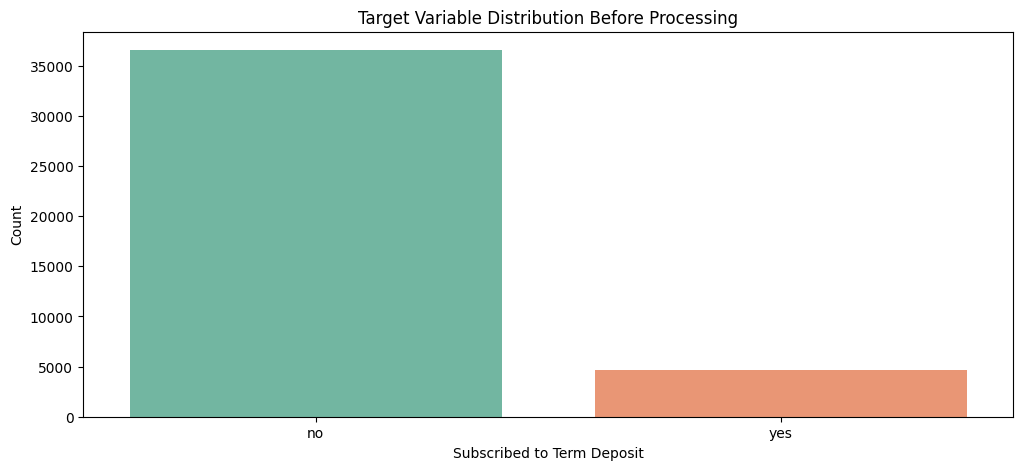

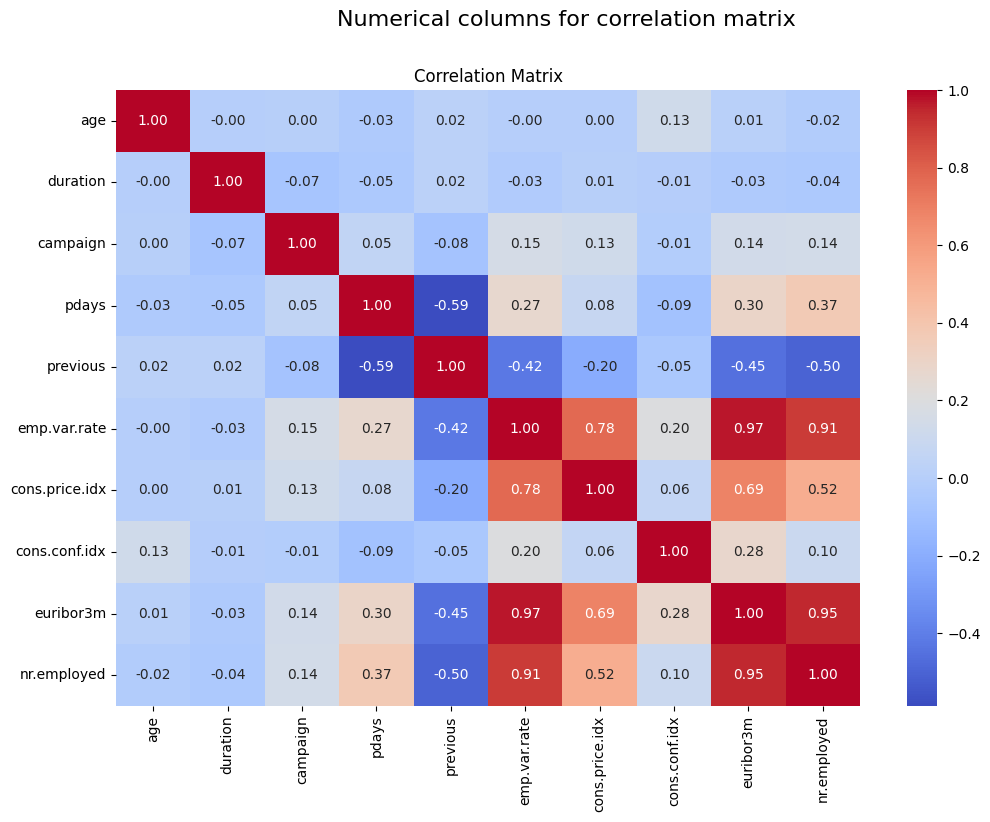

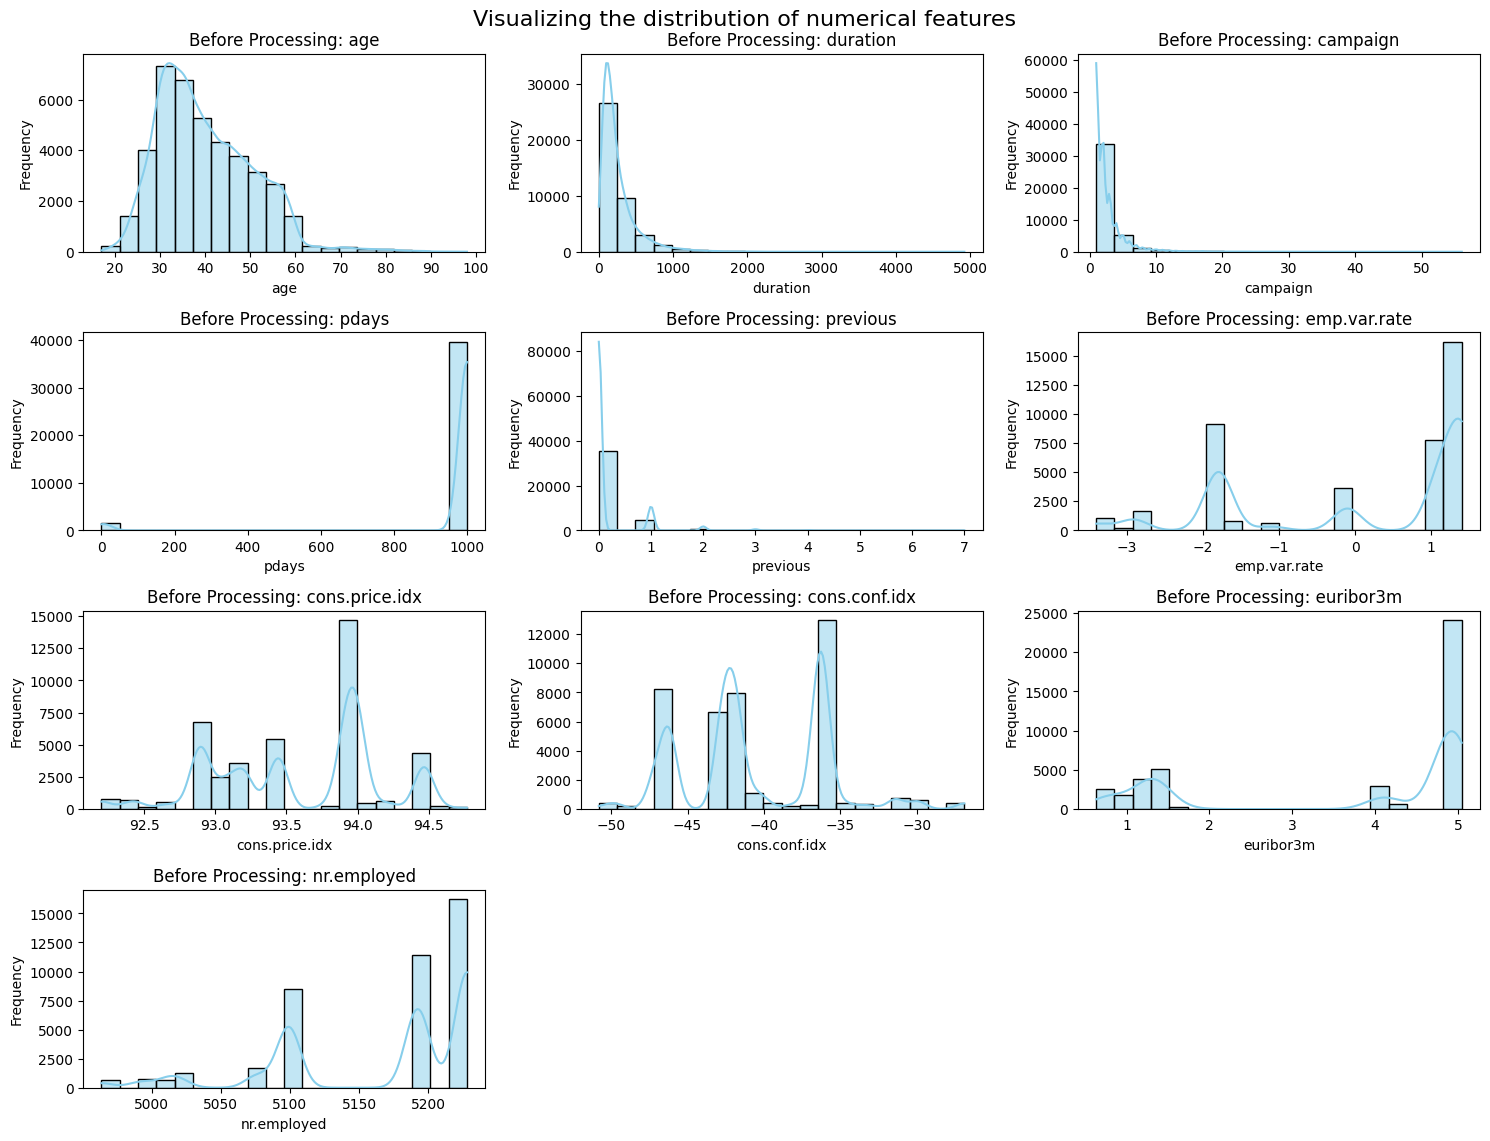

<Figure size 640x480 with 0 Axes>

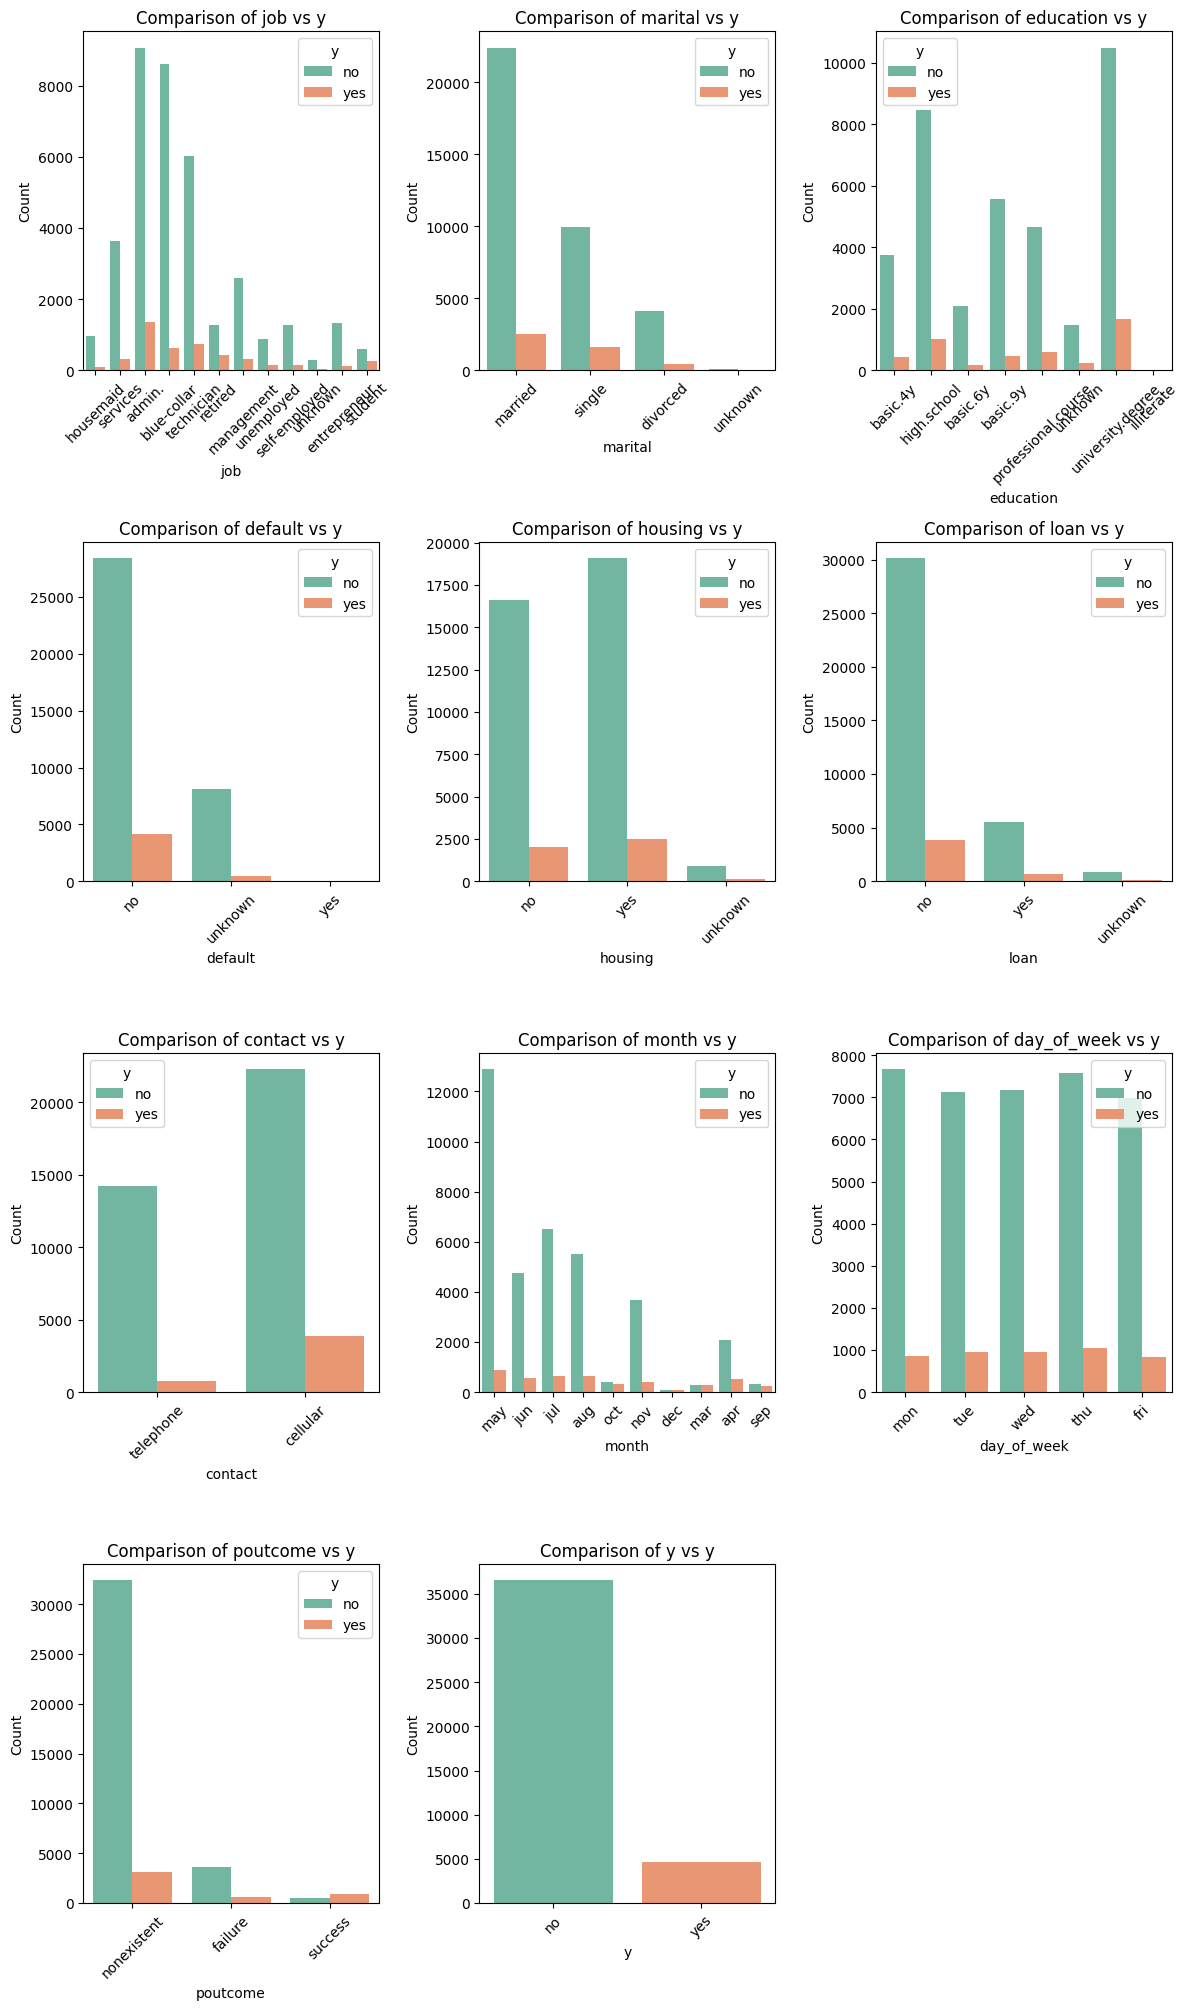

In [164]:
import matplotlib.pyplot as plt
import seaborn as sns

#--------VISUALIZING----------

# Visualize the target variable distribution before preprocessing
plt.figure(figsize=(12, 5))
sns.countplot(data=data, x='y', palette='Set2', hue='y', dodge=False)
plt.title("Target Variable Distribution Before Processing")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")
plt.show()

# Select only numerical columns for correlation matrix
numerical_data = data.select_dtypes(include=['int64', 'float64'])

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 8))
plt.suptitle("Numerical columns for correlation matrix", fontsize=16)
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Visualizing the distribution of numerical features before preprocessing
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(15, 14))
plt.suptitle("Visualizing the distribution of numerical features", fontsize=16)
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 3, i)
    sns.histplot(data[col], bins=20, kde=True, color='skyblue')
    plt.title(f"Before Processing: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

# Function to plot count bar charts comparing each categorical column with two 'y' variable
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot count bar charts comparing each categorical column with the target variable 'y'
def plot_categorical_vs_target(data, target_column):
    categorical_columns = data.select_dtypes(include=['object']).columns  # Select categorical columns

    # Create a subplot for each categorical column
    plt.suptitle("Comparison of columns vs target_column", fontsize=16)
    plt.figure(figsize=(12, len(categorical_columns) * 5))


    for i, col in enumerate(categorical_columns, 1):
        plt.subplot(len(categorical_columns), 3, i)  # Create subplot for each column
        sns.countplot(data=data, x=col, hue=target_column, palette='Set2')  # Plot count plot
        plt.title(f"Comparison of {col} vs {target_column}")  # Set title
        plt.xlabel(col)  # Set x-axis label
        plt.ylabel("Count")  # Set y-axis label
        plt.xticks(rotation=45)  # Rotate x-axis labels for readability

    plt.tight_layout()  # Ensure subplots fit within the figure
    plt.show()

# Call the function with the dataset and target column 'y'
plot_categorical_vs_target(data, 'y')

Since there is a significant imbalance in the target variable (with many more "no" responses than "yes"), it might be necessary to use techniques like SMOTE (Synthetic Minority Over-sampling Technique) to balance the classes before training a model.

# 3.Cleaning the Data

In [165]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [166]:
# Step 1: Check if 'y' exists in the dataset
print("Initial columns in the dataset:", data.columns)
if 'y' not in data.columns:
    raise KeyError("'y' column is missing in the original dataset!")

# Step 2: Separate the target ('y') column
target = data['y']
print("Target column before transformations:", target.head())

# Step 3: Drop the target column from features
data_cleaned = data.drop('y', axis=1)
print("Columns after removing 'y':", data_cleaned.columns)


Initial columns in the dataset: Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
Target column before transformations: 0    no
1    no
2    no
3    no
4    no
Name: y, dtype: object
Columns after removing 'y': Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')


In [167]:
# Step 4: Remove duplicates
data_cleaned = data_cleaned.drop_duplicates()
print(f"Number of duplicates removed: {data.shape[0] - data_cleaned.shape[0]}")


Number of duplicates removed: 12


In [168]:
# Step 5: Handle invalid values (e.g., negative ages)
invalid_age_count = (data_cleaned['age'] < 0).sum()
data_cleaned = data_cleaned[data_cleaned['age'] >= 0]
print(f"Removed {invalid_age_count} rows with invalid ages.")


Removed 0 rows with invalid ages.


In [169]:
# Import SimpleImputer
from sklearn.impute import SimpleImputer

# Step 6: Handle missing data
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns

# Impute numerical columns with median
numerical_imputer = SimpleImputer(strategy='median')
data_cleaned[numerical_cols] = numerical_imputer.fit_transform(data_cleaned[numerical_cols])

# Impute categorical columns with the most frequent value
categorical_imputer = SimpleImputer(strategy='most_frequent')
data_cleaned[categorical_cols] = categorical_imputer.fit_transform(data_cleaned[categorical_cols])

print("Handled missing data for numerical and categorical columns.")
print("Number of missing values remaining:", data_cleaned.isnull().sum().sum())


Handled missing data for numerical and categorical columns.
Number of missing values remaining: 0



Processing column: job
  'unknown' values: 330 out of 41176 (0.80%)

Processing column: marital
  'unknown' values: 80 out of 41176 (0.19%)

Processing column: education
  'unknown' values: 1730 out of 41176 (4.20%)

Processing column: default
  'unknown' values: 8596 out of 41176 (20.88%)

Processing column: housing
  'unknown' values: 990 out of 41176 (2.40%)

Processing column: loan
  'unknown' values: 990 out of 41176 (2.40%)

Processing column: contact
  'unknown' values: 0 out of 41176 (0.00%)

Processing column: month
  'unknown' values: 0 out of 41176 (0.00%)

Processing column: day_of_week
  'unknown' values: 0 out of 41176 (0.00%)

Processing column: poutcome
  'unknown' values: 0 out of 41176 (0.00%)

Processed 'unknown' values in categorical columns.


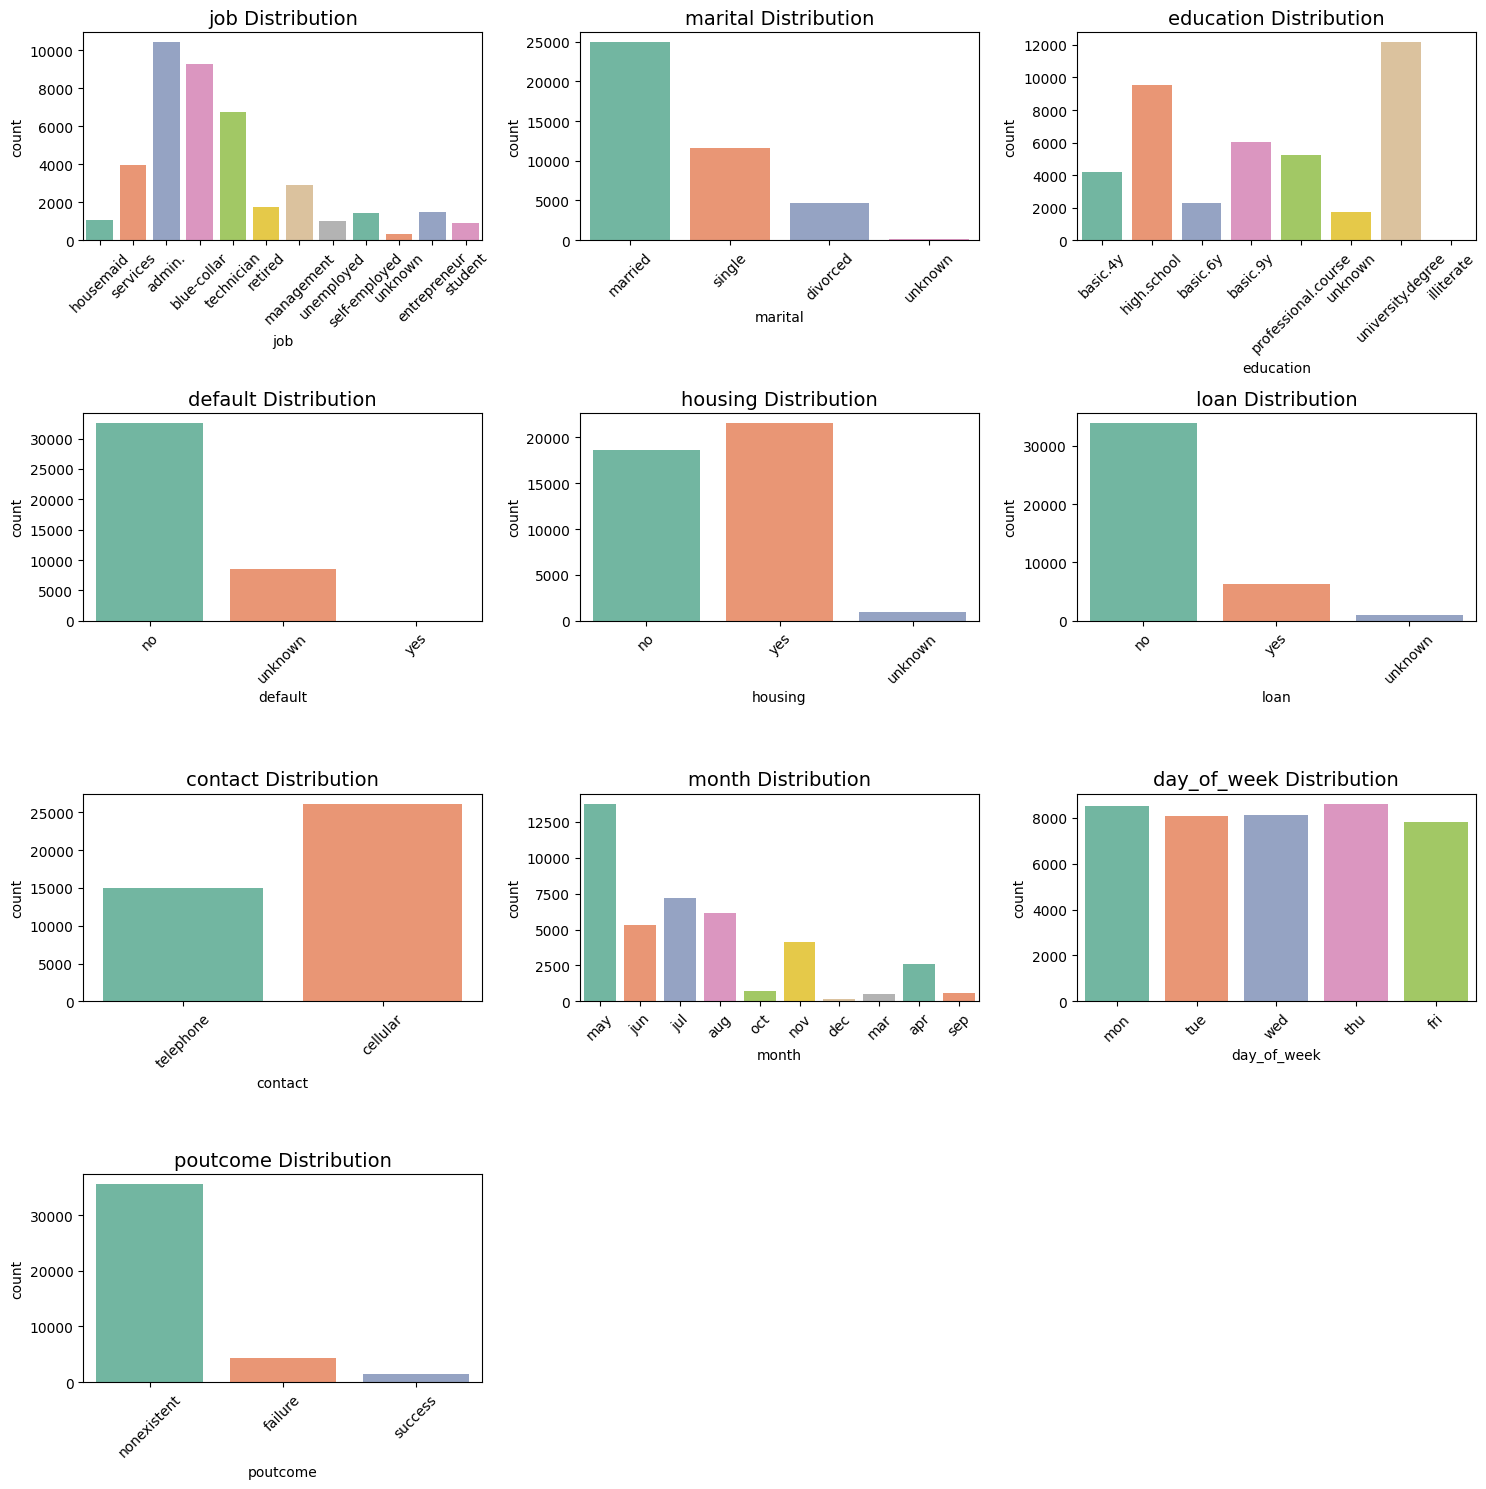

In [170]:
import numpy as np  # Import NumPy


# Step 7: Handle 'unknown' values in categorical columns
for col in categorical_cols:
    unknown_count = (data_cleaned[col] == 'unknown').sum()
    total_count = len(data_cleaned)
    print(f"\nProcessing column: {col}")
    print(f"  'unknown' values: {unknown_count} out of {total_count} ({(unknown_count / total_count) * 100:.2f}%)")

print("\nProcessed 'unknown' values in categorical columns.")

# ** Distribution of Categorical Features **

plt.figure(figsize=(15, 15))  # Increased height here
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(4, 3, i)  # You can adjust this to fit the number of categorical variables
    sns.countplot(data=data, x=col, hue=col, palette='Set2', dodge=False)
    plt.title(f"{col} Distribution", fontsize=14)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Since education,default,housing and loan has more unknown values didnt handle because it will create more duplicate values which will affect the prediction and accuracy

In [171]:
import numpy as np  # Import NumPy
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# Step 7: Handle 'unknown' values in categorical columns
for col in categorical_cols:
    unknown_count = (data_cleaned[col] == 'unknown').sum()
    total_count = len(data_cleaned)
    proportion_unknown = unknown_count / total_count

    print(f"\nProcessing column: {col}")
    print(f"  'unknown' values: {unknown_count} out of {total_count} ({proportion_unknown * 100:.2f}%)")

    # Retain 'unknown' as a separate category if its proportion is greater than 0.9%
    if proportion_unknown > 0.009:  # Adjusted threshold to 0.9%
        print(f"  Retaining 'unknown' as a separate category for {col}.")
    else:
        # Replace 'unknown' with the most frequent value otherwise
        data_cleaned[col] = data_cleaned[col].replace('unknown', np.nan)
        imputer = SimpleImputer(strategy='most_frequent')
        data_cleaned[col] = imputer.fit_transform(data_cleaned[[col]]).ravel()
        print(f"  Replaced 'unknown' values with most frequent value in {col}.")

print("\nProcessed 'unknown' values in categorical columns.")



Processing column: job
  'unknown' values: 330 out of 41176 (0.80%)
  Replaced 'unknown' values with most frequent value in job.

Processing column: marital
  'unknown' values: 80 out of 41176 (0.19%)
  Replaced 'unknown' values with most frequent value in marital.

Processing column: education
  'unknown' values: 1730 out of 41176 (4.20%)
  Retaining 'unknown' as a separate category for education.

Processing column: default
  'unknown' values: 8596 out of 41176 (20.88%)
  Retaining 'unknown' as a separate category for default.

Processing column: housing
  'unknown' values: 990 out of 41176 (2.40%)
  Retaining 'unknown' as a separate category for housing.

Processing column: loan
  'unknown' values: 990 out of 41176 (2.40%)
  Retaining 'unknown' as a separate category for loan.

Processing column: contact
  'unknown' values: 0 out of 41176 (0.00%)
  Replaced 'unknown' values with most frequent value in contact.

Processing column: month
  'unknown' values: 0 out of 41176 (0.00%)
  R

Visualization of pre processed data

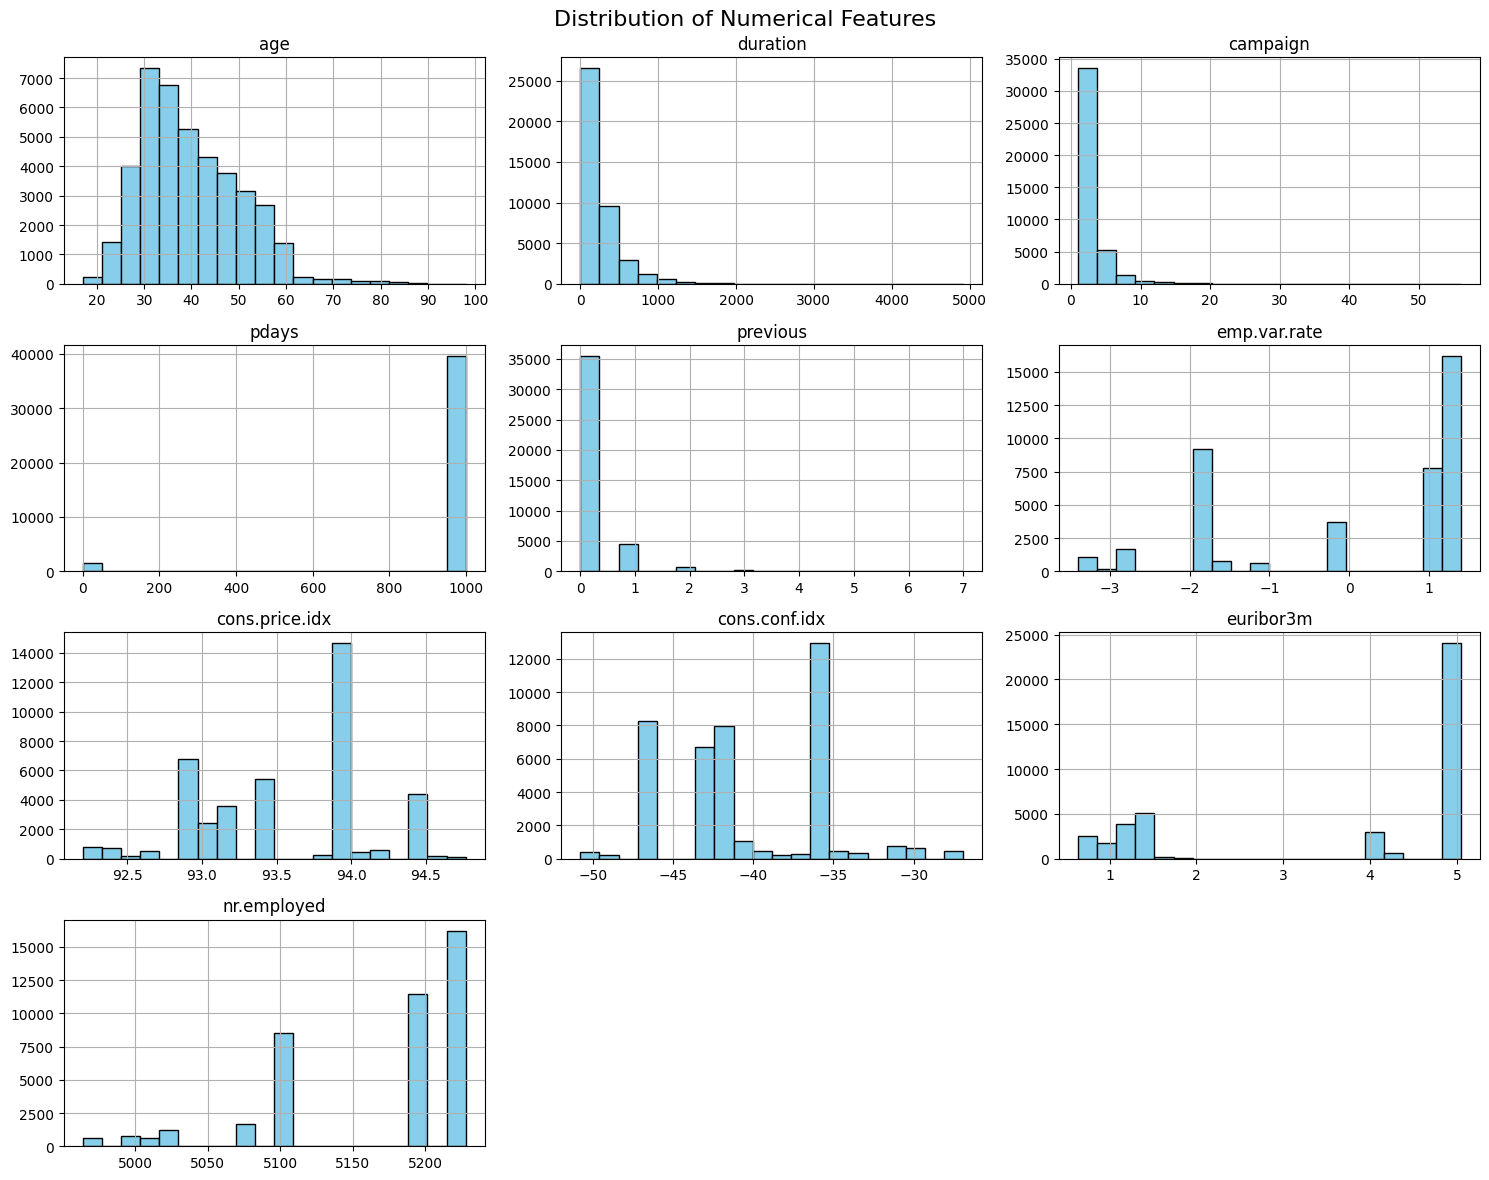

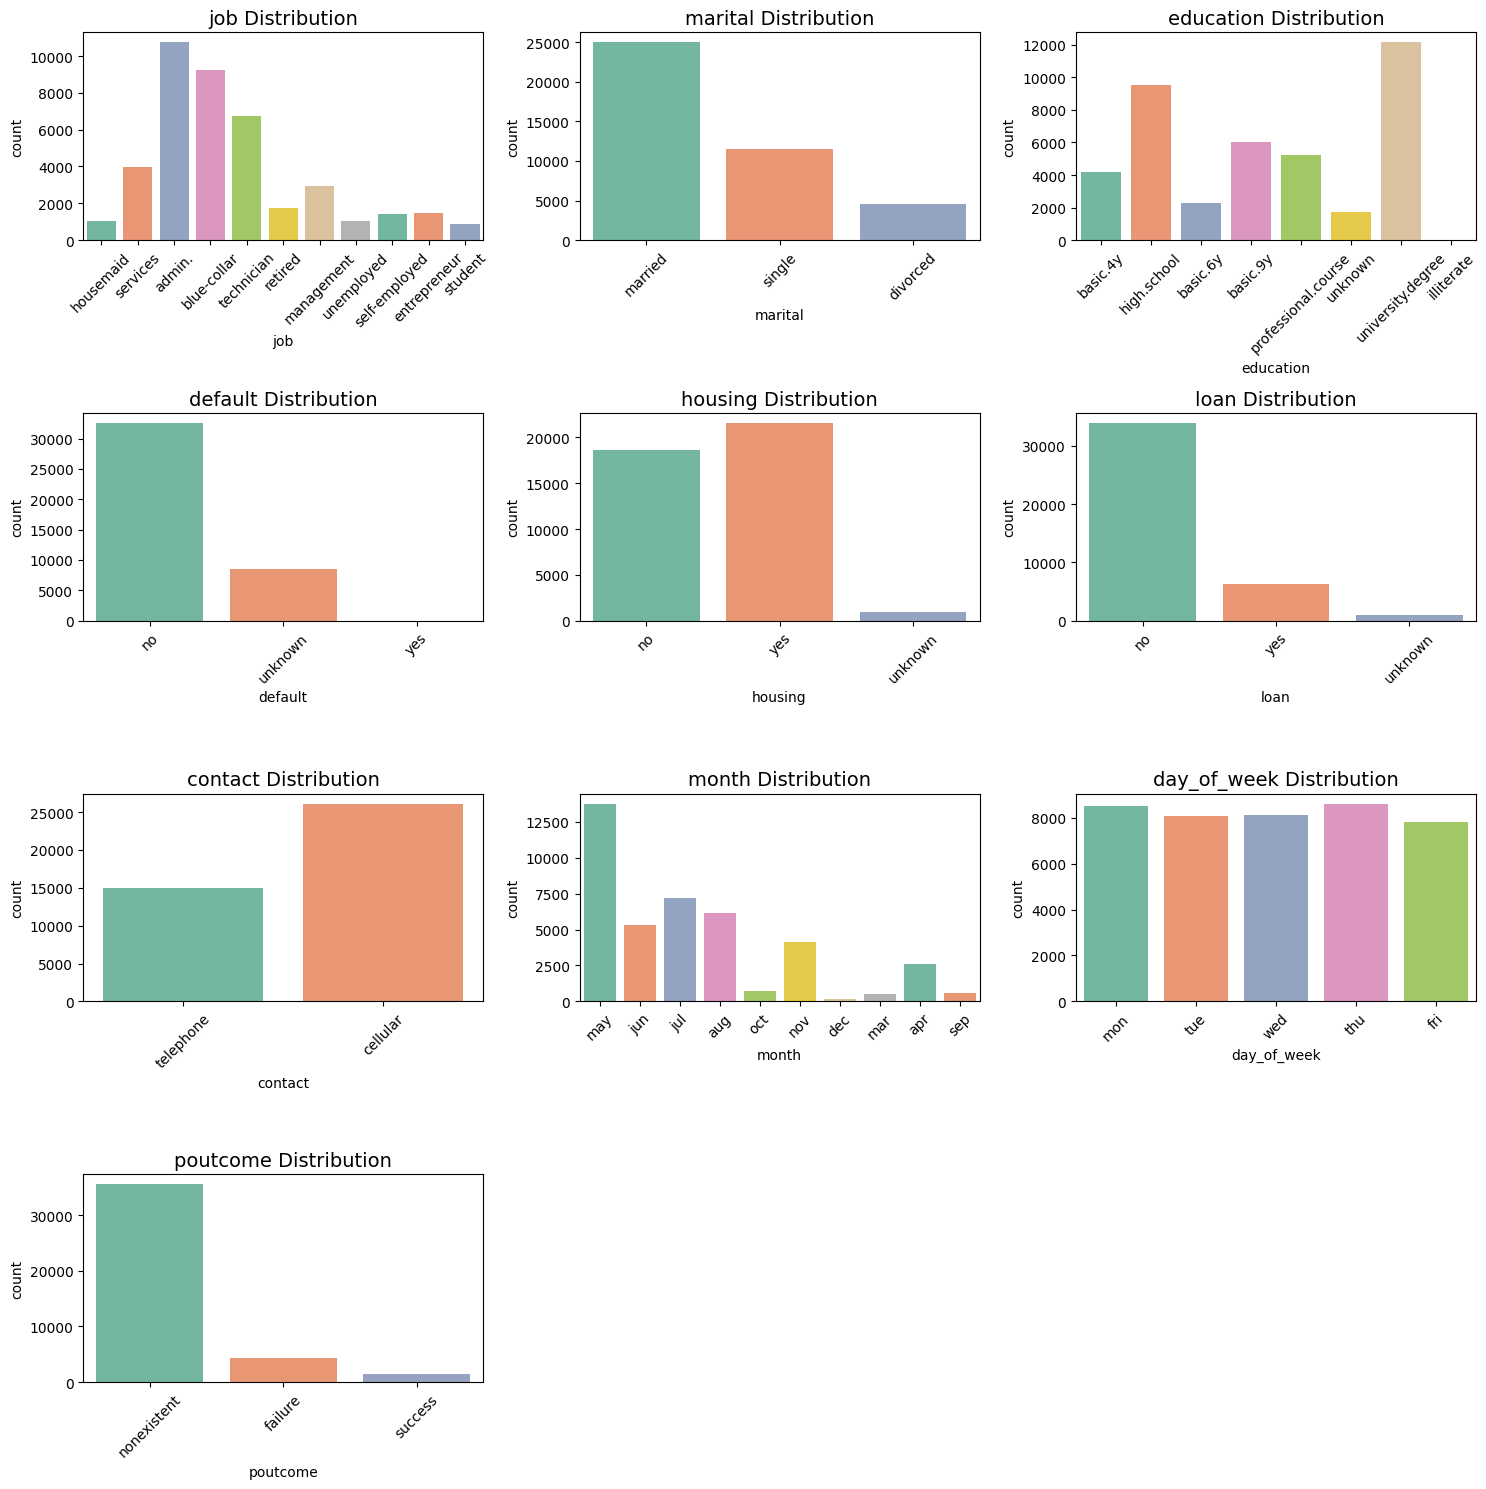

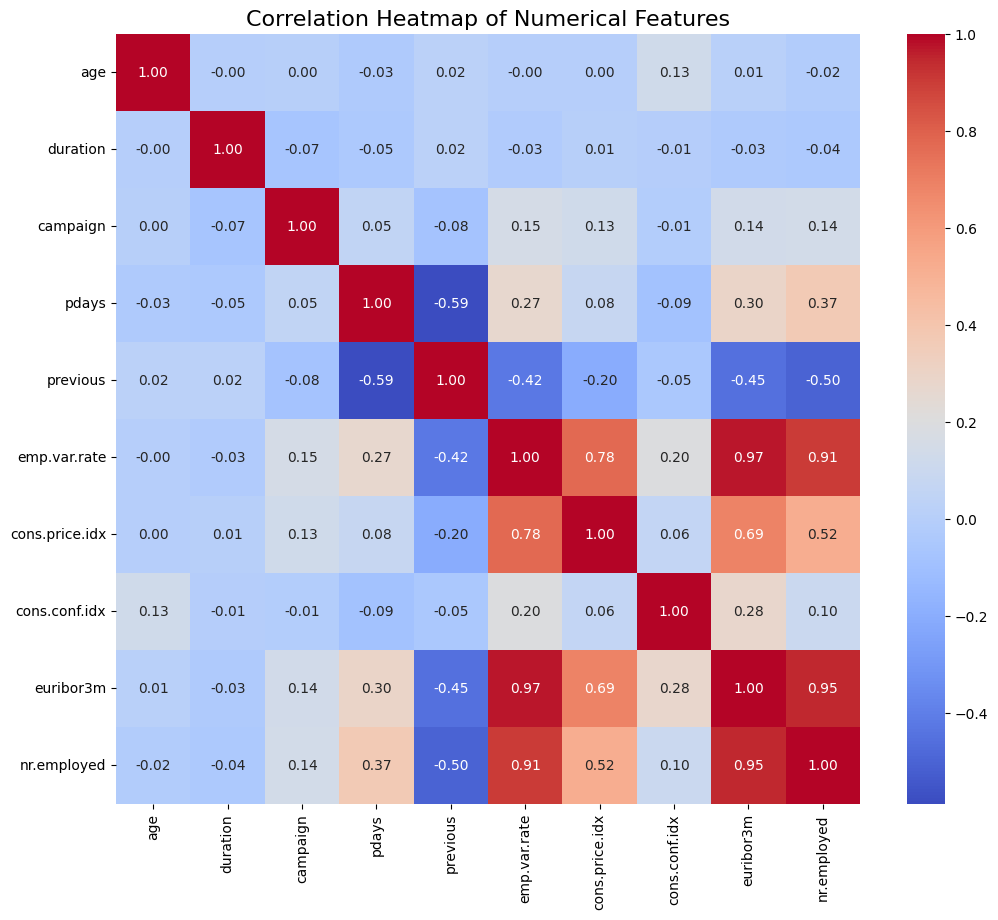

<Figure size 1200x800 with 0 Axes>

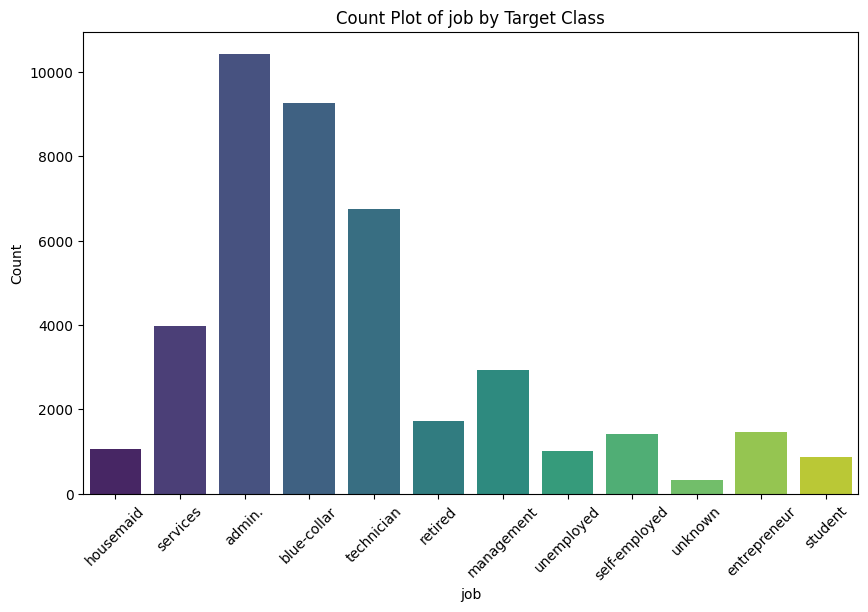

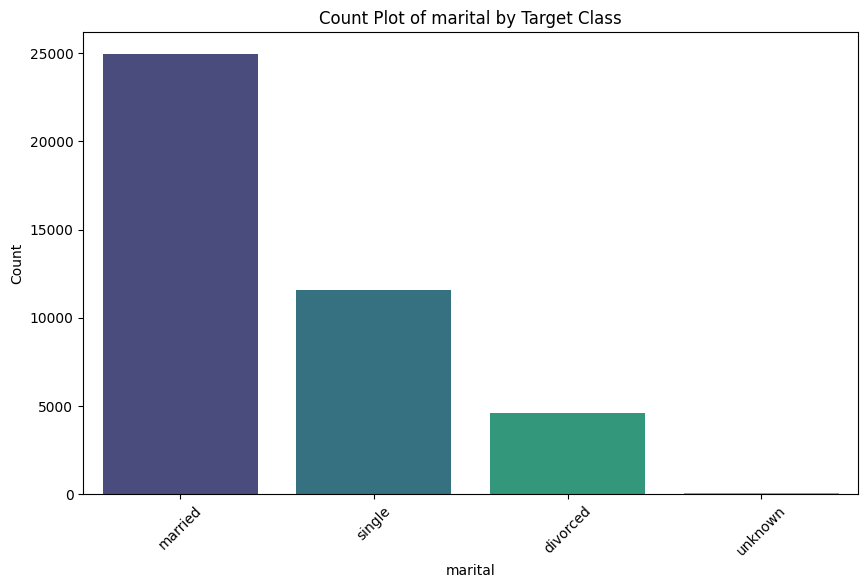

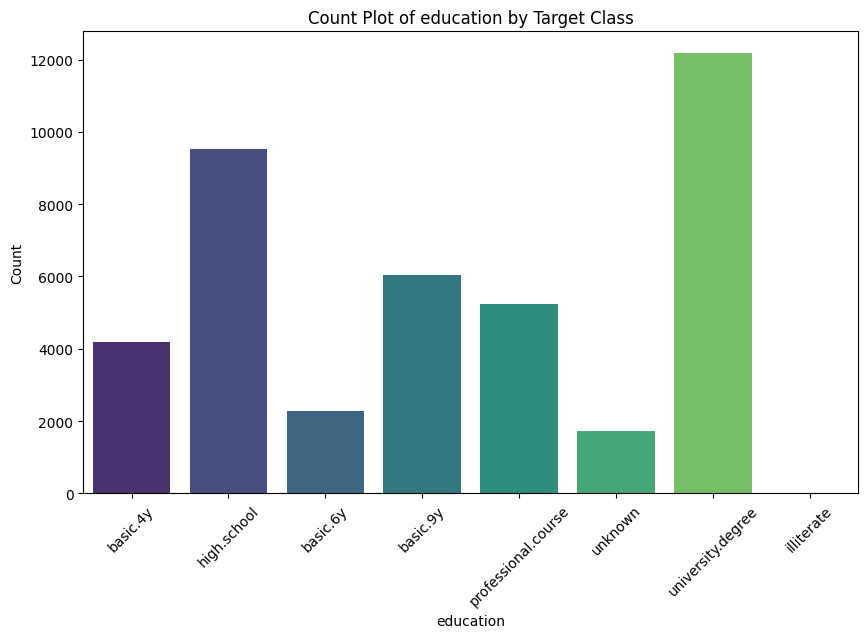

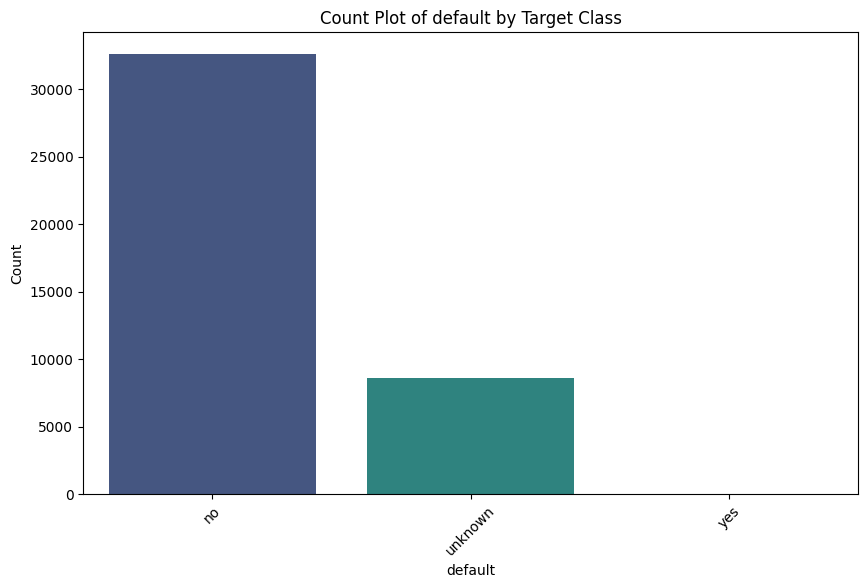

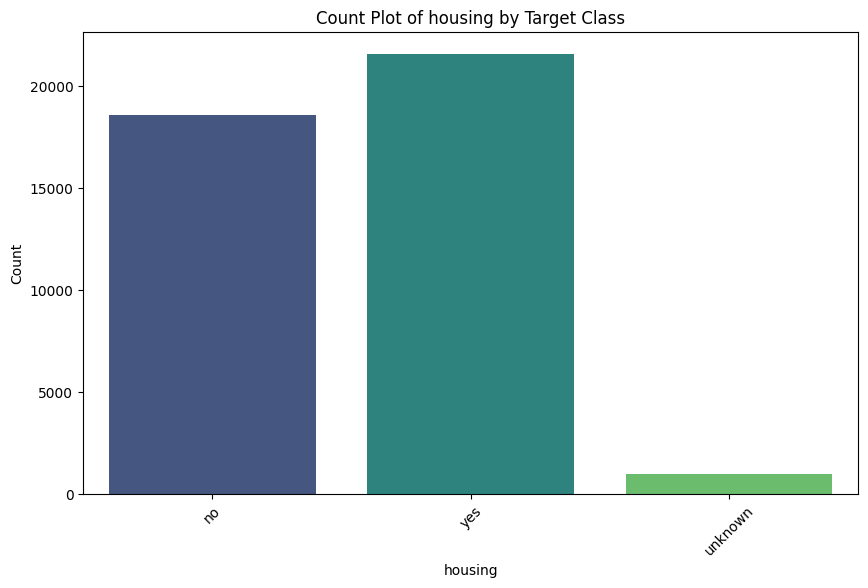

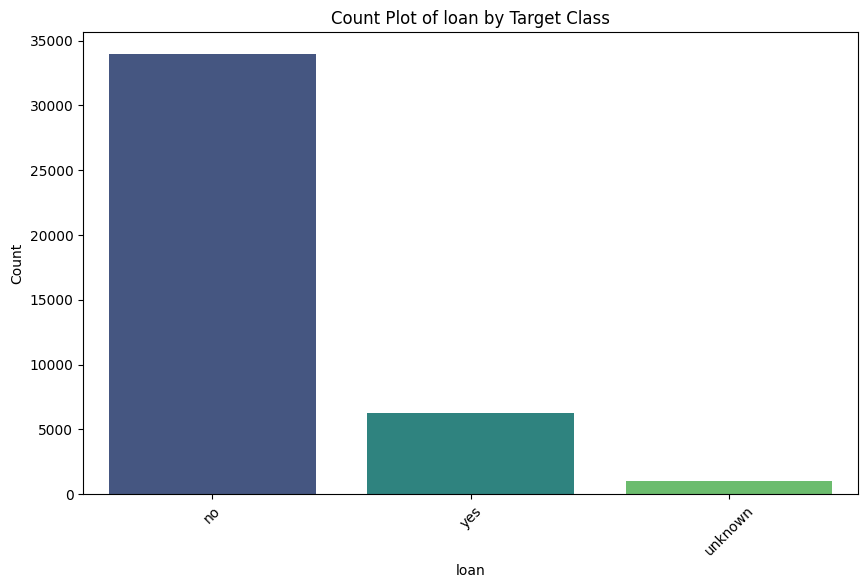

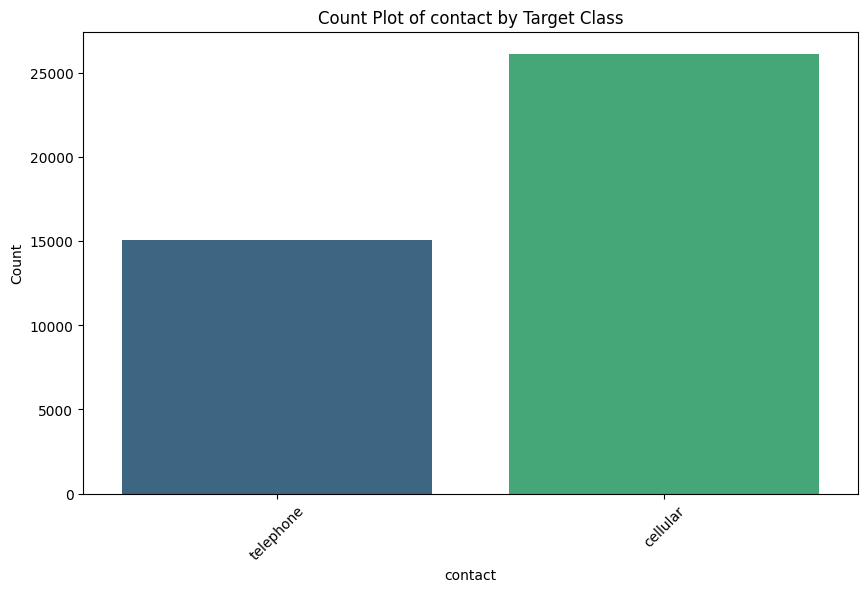

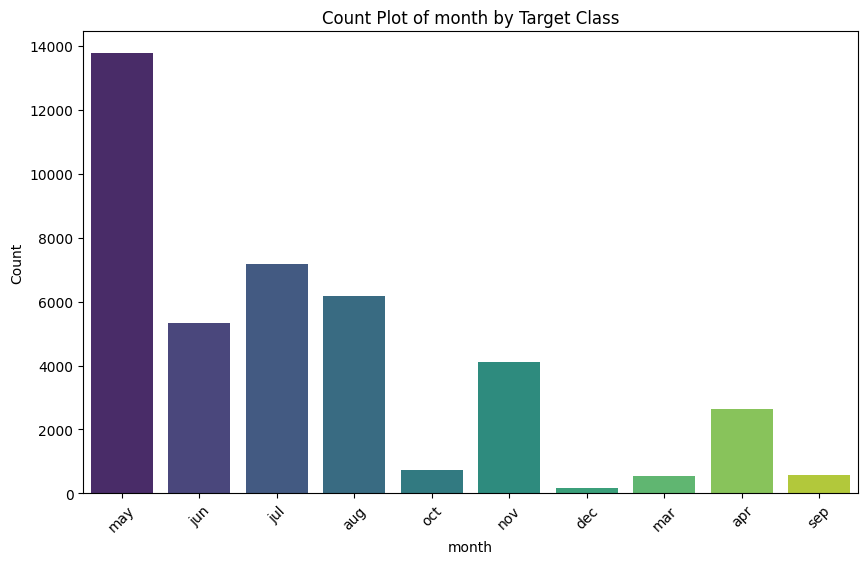

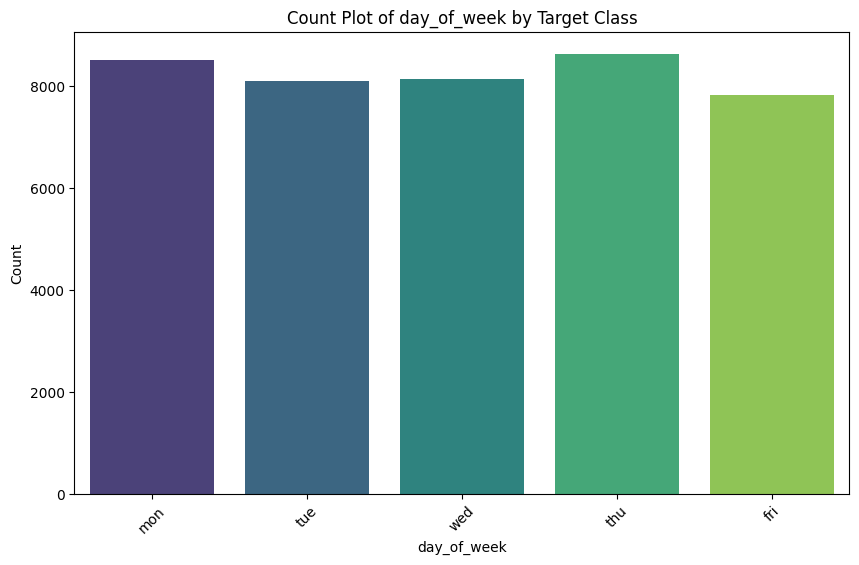

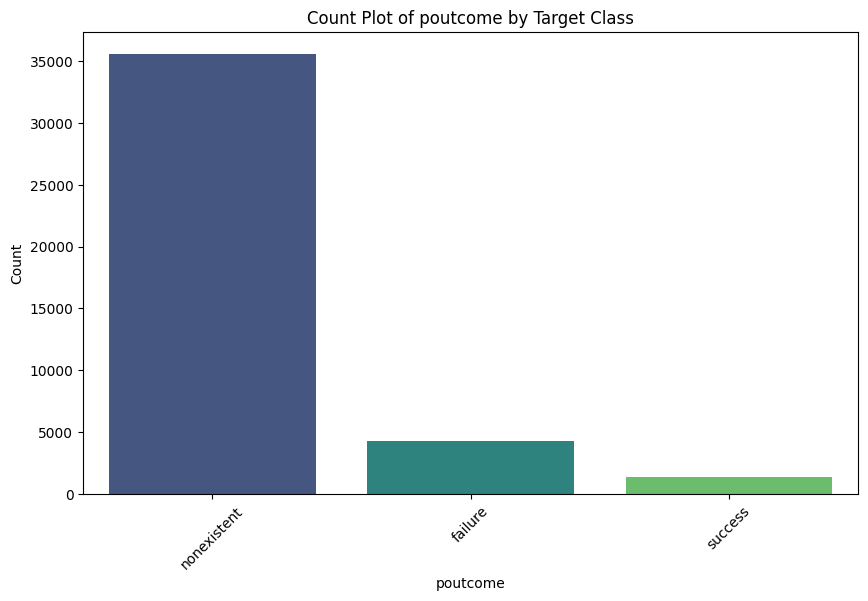

In [172]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

# Load dataset (make sure the path is correct)
df = data_cleaned

# ** 3. Distribution of Numerical Features **
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns].hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')  # Increased height here
plt.suptitle("Distribution of Numerical Features", fontsize=16)
plt.tight_layout()
plt.show()

# ** 4. Distribution of Categorical Features **
categorical_columns = df.select_dtypes(include=['object']).columns

plt.figure(figsize=(15, 15))  # Increased height here
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)  # You can adjust this to fit the number of categorical variables
    sns.countplot(data=df, x=col, hue=col, palette='Set2', dodge=False)
    plt.title(f"{col} Distribution", fontsize=14)
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ** 5. Correlation Heatmap for Numerical Features **
plt.figure(figsize=(12, 10))  # Increased size for better visibility
corr_matrix = df[numerical_columns].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.show()

# ** 6. Categorical Features by Target Distribution **
plt.figure(figsize=(12, 8))
for i, col in enumerate(categorical_columns, 1):
    plt.figure(figsize=(10, 6))
    sns.countplot(data=data, x=col, palette='viridis', hue=col, dodge=False)
    plt.title(f"Count Plot of {col} by Target Class")
    plt.xticks(rotation=45)
    plt.ylabel("Count")
    plt.show()



In [173]:
# Step 8: Special handling for 'pdays' column
pdays_count = (data_cleaned['pdays'] == 999).sum()
print(f"\nProcessing 'pdays' column: {pdays_count} values are 999 and will be replaced with NaN.")
data_cleaned['pdays'] = data_cleaned['pdays'].replace(999, np.nan)
pdays_imputer = SimpleImputer(strategy='median')
data_cleaned['pdays'] = pdays_imputer.fit_transform(data_cleaned[['pdays']])

print("Processed 'pdays' column.")



Processing 'pdays' column: 39661 values are 999 and will be replaced with NaN.
Processed 'pdays' column.


In [174]:
# Step 9: Remove outliers using z-scores

from scipy import stats  # Import the stats module from scipy

z_scores = stats.zscore(data_cleaned[numerical_cols])
outliers_count = (z_scores > 3).any(axis=1).sum()
data_cleaned = data_cleaned[(z_scores < 3).all(axis=1)]
target = target[data_cleaned.index]

print(f"Removed {outliers_count} rows with outliers.")


Removed 3247 rows with outliers.


In [175]:
# Step 10: One-hot encoding for categorical columns
data_cleaned = pd.get_dummies(data_cleaned, drop_first=True)
print("Performed one-hot encoding. Dataset now has", data_cleaned.shape[1], "columns.")


Performed one-hot encoding. Dataset now has 51 columns.


In [177]:
# Step 11: Label encoding for the target variable ('y')
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

print("Target variable encoded. Class distribution:")
print(pd.Series(target_encoded).value_counts())


Target variable encoded. Class distribution:
0    34584
1     3345
Name: count, dtype: int64


In [178]:
# Step 12: Feature scaling (standardization)
from sklearn.preprocessing import StandardScaler  # Import StandardScaler

scaler = StandardScaler()
data_cleaned[numerical_cols] = scaler.fit_transform(data_cleaned[numerical_cols])

print("Standardized numerical features.")
print(f"First 5 rows of standardized features:\n{data_cleaned[numerical_cols].head()}")


Standardized numerical features.
First 5 rows of standardized features:
        age  duration  campaign     pdays  previous  emp.var.rate  \
0  1.685043  0.140284   -0.7432  0.093211 -0.352688      0.621701   
1  1.788278 -0.446170   -0.7432  0.093211 -0.352688      0.621701   
2 -0.276423 -0.042983   -0.7432  0.093211 -0.352688      0.621701   
3  0.033282 -0.435698   -0.7432  0.093211 -0.352688      0.621701   
4  1.685043  0.381149   -0.7432  0.093211 -0.352688      0.621701   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
0        0.738522       0.919918   0.683117     0.287361  
1        0.738522       0.919918   0.683117     0.287361  
2        0.738522       0.919918   0.683117     0.287361  
3        0.738522       0.919918   0.683117     0.287361  
4        0.738522       0.919918   0.683117     0.287361  


In [179]:
# Step 13: Drop 'duration' column
if 'duration' in data_cleaned.columns:
    data_cleaned = data_cleaned.drop(columns=['duration'])
    print("Dropped the 'duration' column for realistic modeling.")


Dropped the 'duration' column for realistic modeling.


In [180]:
# Step 14: Feature Engineering
# Create age groups
print(data_cleaned.columns)
print("\nCreating age groups...")
data_cleaned['age_group'] = pd.cut(data_cleaned['age'], bins=[0, 25, 45, 65, 100], labels=['young', 'adult', 'senior', 'elder'])

# Check the first few rows of the 'age_group' column
print(f"First 5 rows of 'age_group' column:\n{data_cleaned[['age', 'age_group']].head()}")

# Interaction features
print("\nCreating interaction features...")
data_cleaned['campaign_previous'] = data_cleaned['campaign'] * data_cleaned['previous']
print(f"First 5 rows of 'campaign_previous' feature:\n{data_cleaned[['campaign', 'previous', 'campaign_previous']].head()}")

# Log transformation for skewed columns
print("\nLog-transforming 'campaign' and 'previous' columns...")
data_cleaned['campaign_log'] = np.log1p(data_cleaned['campaign'])
data_cleaned['previous_log'] = np.log1p(data_cleaned['previous'])

# Check the first few rows of the transformed columns
print(f"First 5 rows of log-transformed features:\n{data_cleaned[['campaign', 'previous', 'campaign_log', 'previous_log']].head()}")

print("\nAdded age groups, interaction, and log-transformed features.")

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success'],
      dtype='object')

Creating age 

In [181]:
# Step 15: Encoding 'age_group'
# One-hot encoding for 'age_group' (or label encoding if preferred)
data_cleaned = pd.get_dummies(data_cleaned, columns=['age_group'], drop_first=True)
print(data_cleaned.columns)

# Ensure all categorical variables are encoded before scaling
categorical_cols = data_cleaned.select_dtypes(include=['object']).columns
if categorical_cols.any():
    print("Categorical columns before encoding:", categorical_cols)
    data_cleaned = pd.get_dummies(data_cleaned, columns=categorical_cols, drop_first=True)

    print("Categorical columns after encoding:", data_cleaned.select_dtypes(include=['object']).columns)
else:
    print("No categorical columns to encode.")




Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success',
       'campaign_previous', 'campaign

In [182]:
# Step 16: Handle class imbalance using SMOTE
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(data_cleaned, target_encoded)

print("Handled class imbalance using SMOTE. Class distribution after resampling:")
print(pd.Series(y_resampled).value_counts())

Handled class imbalance using SMOTE. Class distribution after resampling:
0    34584
1    34584
Name: count, dtype: int64


In [183]:
# ---- Final Validation ----
print("\nSummary Statistics After Preprocessing:")
print(pd.DataFrame(X_resampled).describe())



Summary Statistics After Preprocessing:
                age      campaign         pdays      previous  emp.var.rate  \
count  69168.000000  69168.000000  69168.000000  69168.000000  69168.000000   
mean      -0.035260     -0.093779     -0.235451      0.176166     -0.420121   
std        1.071160      0.909379      1.848985      1.185897      1.127526   
min       -2.341124     -0.743200    -19.068836     -0.352688     -2.299971   
25%       -0.887870     -0.743200      0.093211     -0.352688     -1.261154   
50%       -0.276423     -0.165785      0.093211     -0.352688     -0.157412   
75%        0.746891      0.366602      0.093211     -0.352688      0.816479   
max        3.233569      4.453539      6.480560      2.835370      0.816479   

       cons.price.idx  cons.conf.idx     euribor3m   nr.employed  \
count    69168.000000   69168.000000  69168.000000  69168.000000   
mean        -0.242955       0.061770     -0.416173     -0.470621   
std          1.100471       1.190176      1

# Visualization

1. Visualizing Class Distribution (Before and After SMOTE)

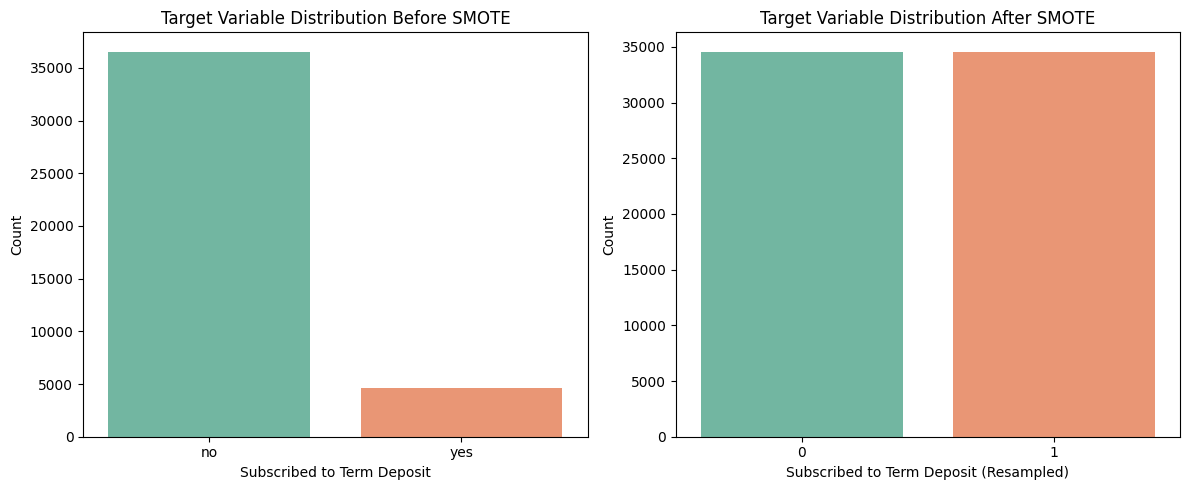

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Convert y_resampled to a pandas Series before using it in sns.countplot if it's a numpy array
y_resampled_series = pd.Series(y_resampled)

# Visualize the target variable distribution after SMOTE (resampling)
plt.figure(figsize=(12, 5))

# Before SMOTE (Initial data)
plt.subplot(1, 2, 1)
sns.countplot(x=data['y'], palette='Set2', hue=data['y'], legend=False)  # Using hue to match the warning suggestion
plt.title("Target Variable Distribution Before SMOTE")
plt.xlabel("Subscribed to Term Deposit")
plt.ylabel("Count")

# After SMOTE (Resampled data)
plt.subplot(1, 2, 2)
sns.countplot(x=y_resampled_series, palette='Set2', hue=y_resampled_series, legend=False)  # Using hue to match the warning suggestion
plt.title("Target Variable Distribution After SMOTE")
plt.xlabel("Subscribed to Term Deposit (Resampled)")
plt.ylabel("Count")

plt.tight_layout()
plt.show()


2. Visualizing Missing Data

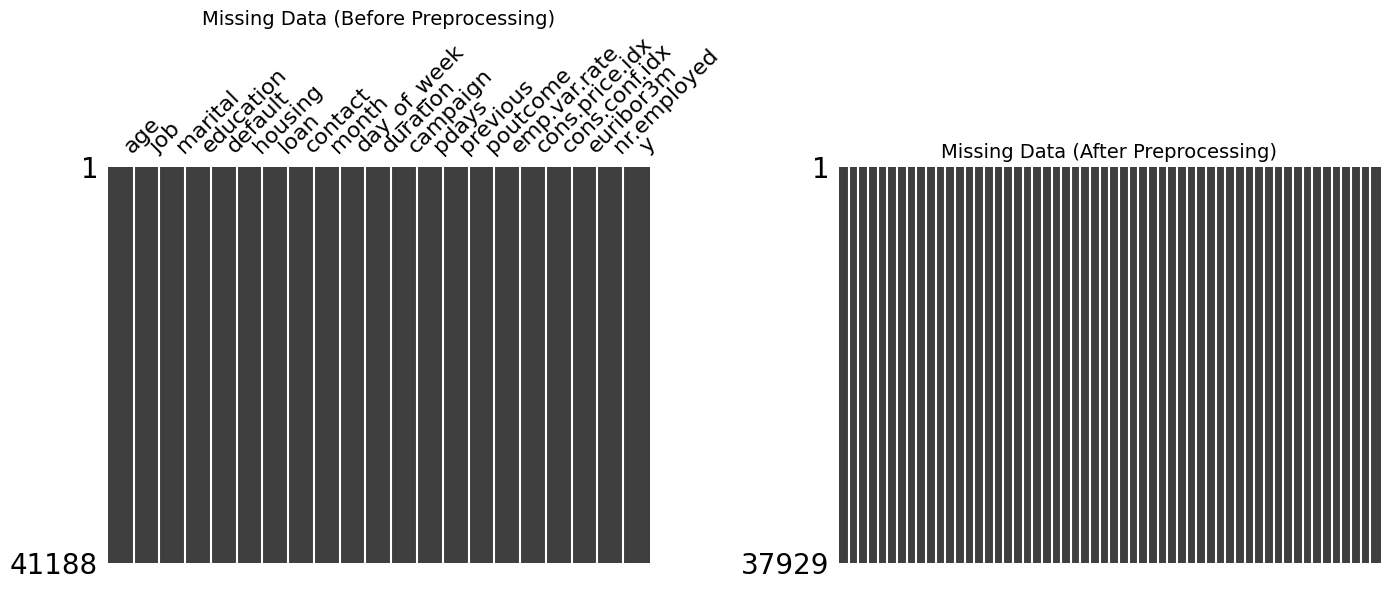

In [186]:
import missingno as msno

# Before Preprocessing
#plt.figure(figsize=(8, 6))
#msno.matrix(data)
#plt.title("Missing Data Visualization (Before Preprocessing)")
#plt.show()

# After Preprocessing
#plt.figure(figsize=(8, 6))
#msno.matrix(data_cleaned)
#plt.title("Missing Data Visualization (After Preprocessing)")
#plt.show()


import missingno as msno
import matplotlib.pyplot as plt

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Missing Data Visualization (Before Preprocessing)
msno.matrix(data, ax=axes[0],sparkline=False)
axes[0].set_title("Missing Data (Before Preprocessing)", fontsize=14)

# Missing Data Visualization (After Preprocessing)
msno.matrix(data_cleaned, ax=axes[1], sparkline=False)
axes[1].set_title("Missing Data (After Preprocessing)", fontsize=14)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


3. Visualizing Boxplots and Histplots of numerical variables

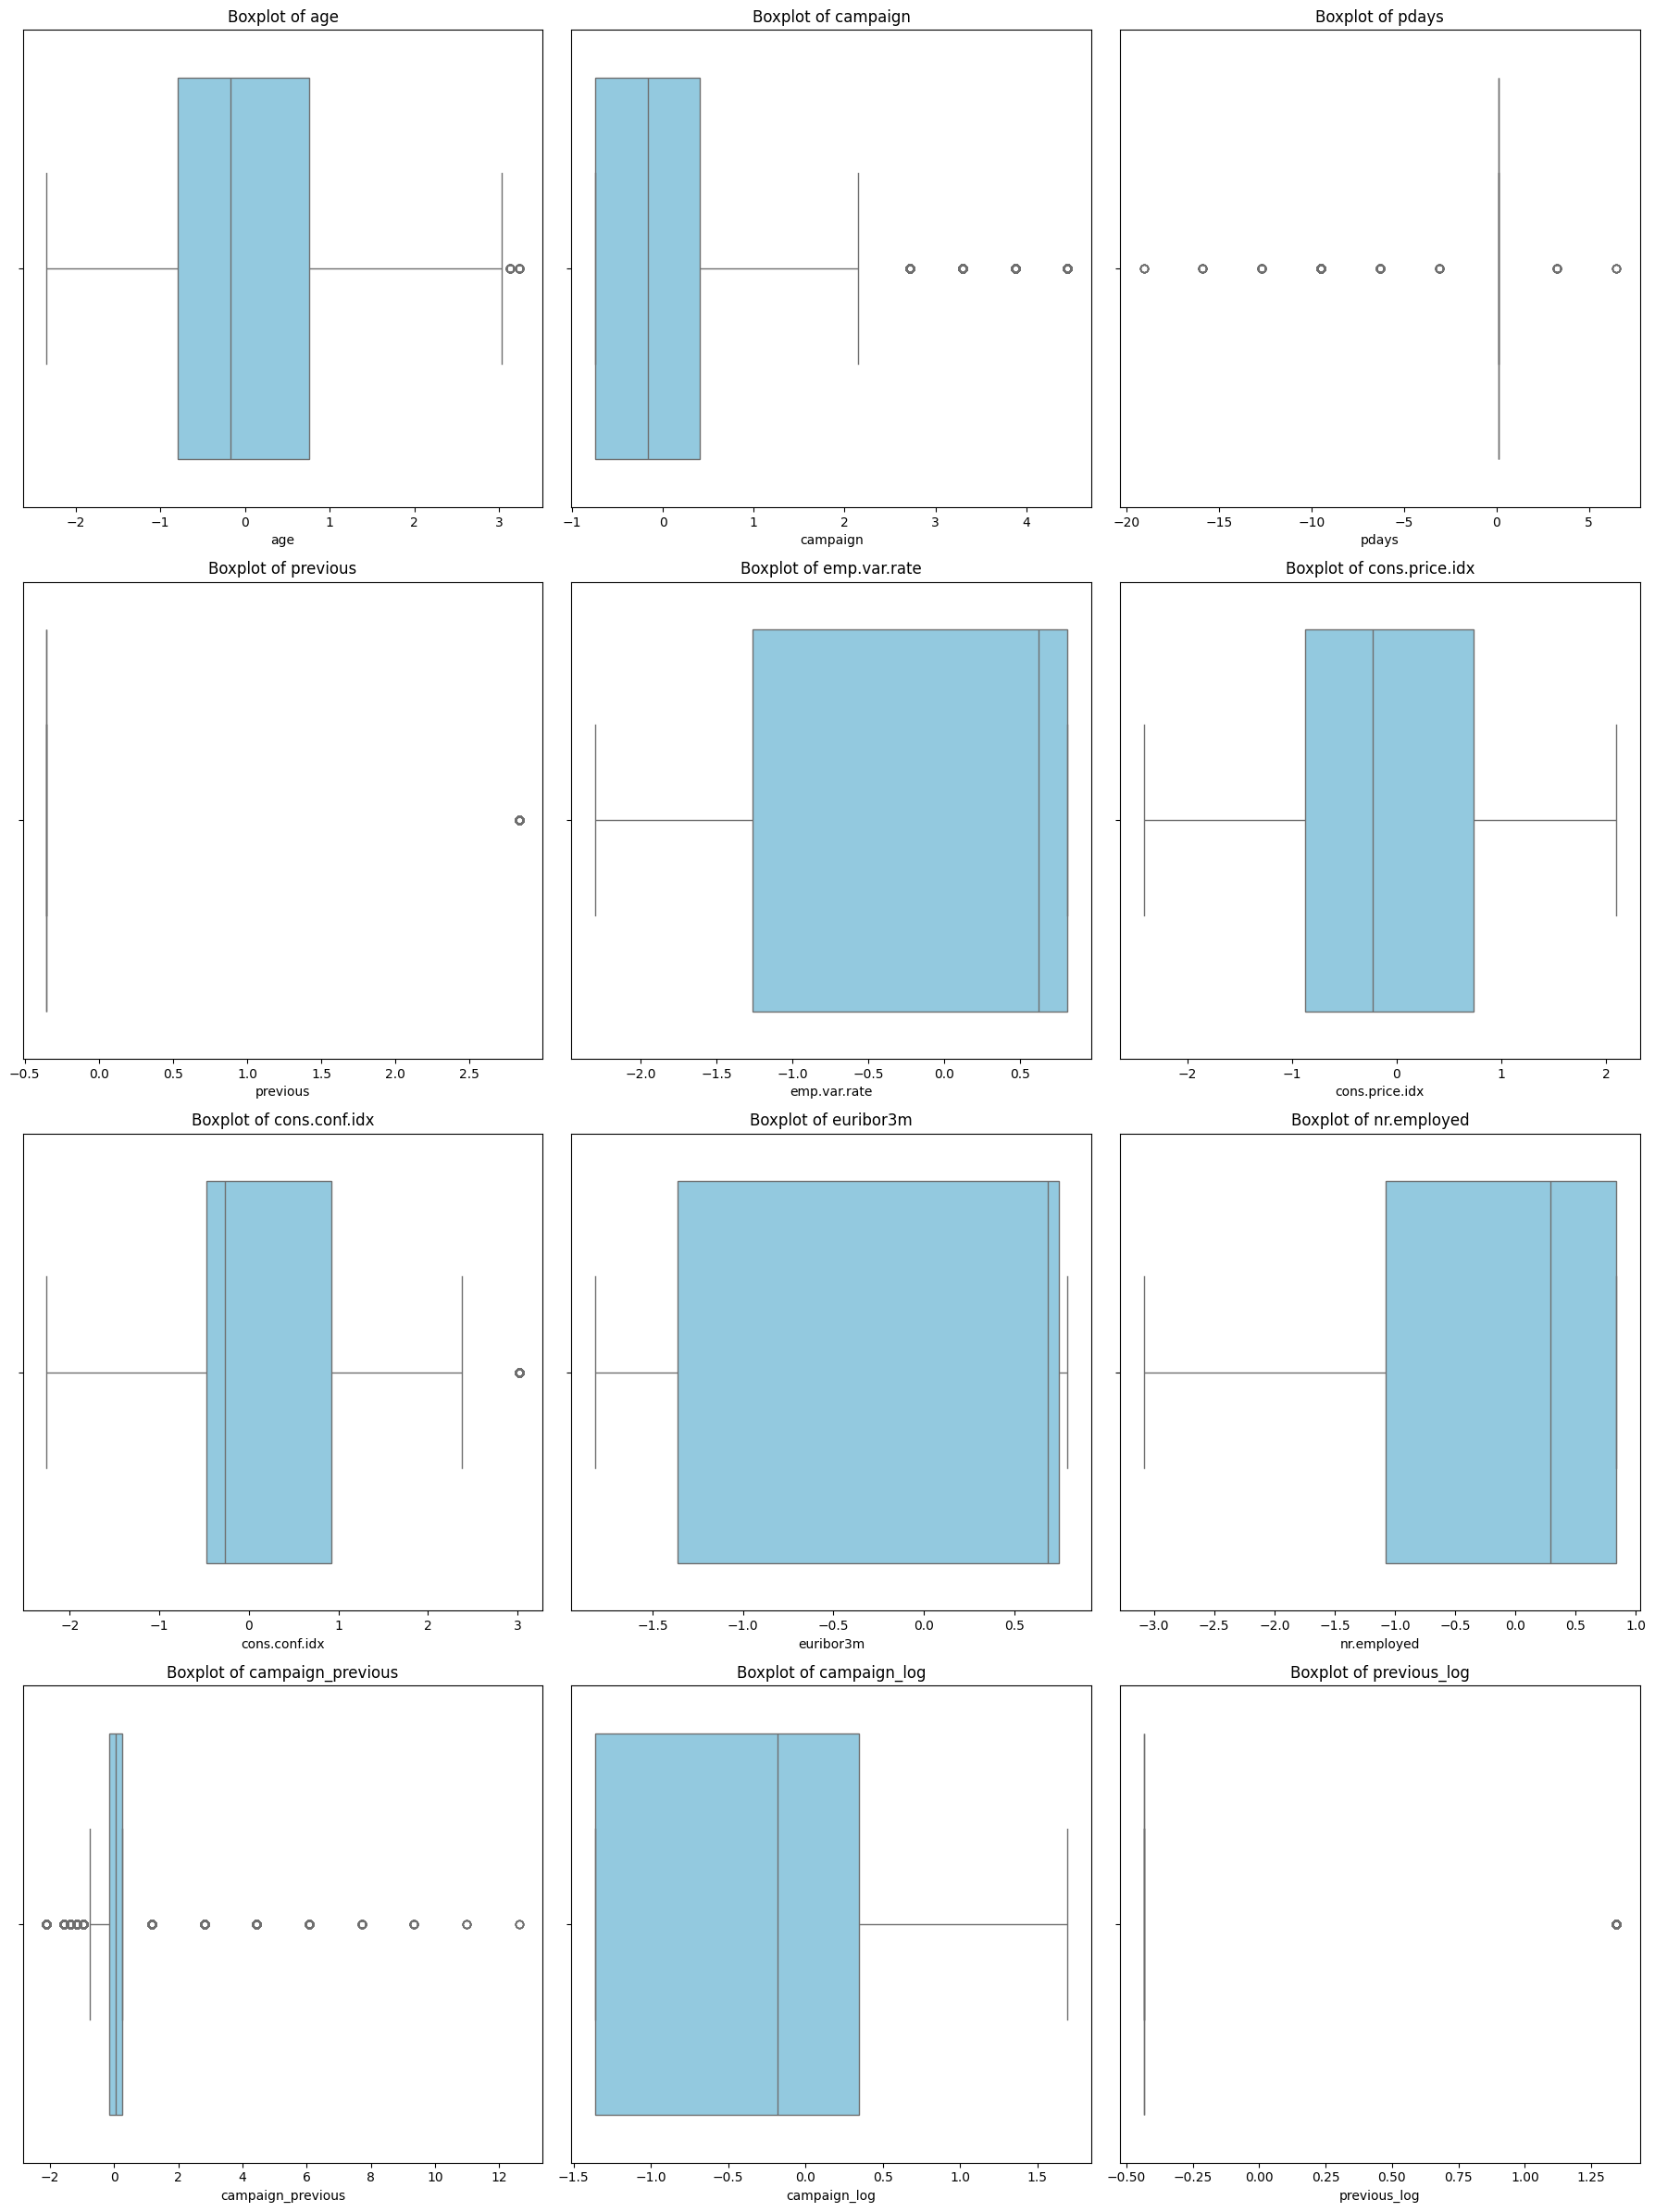

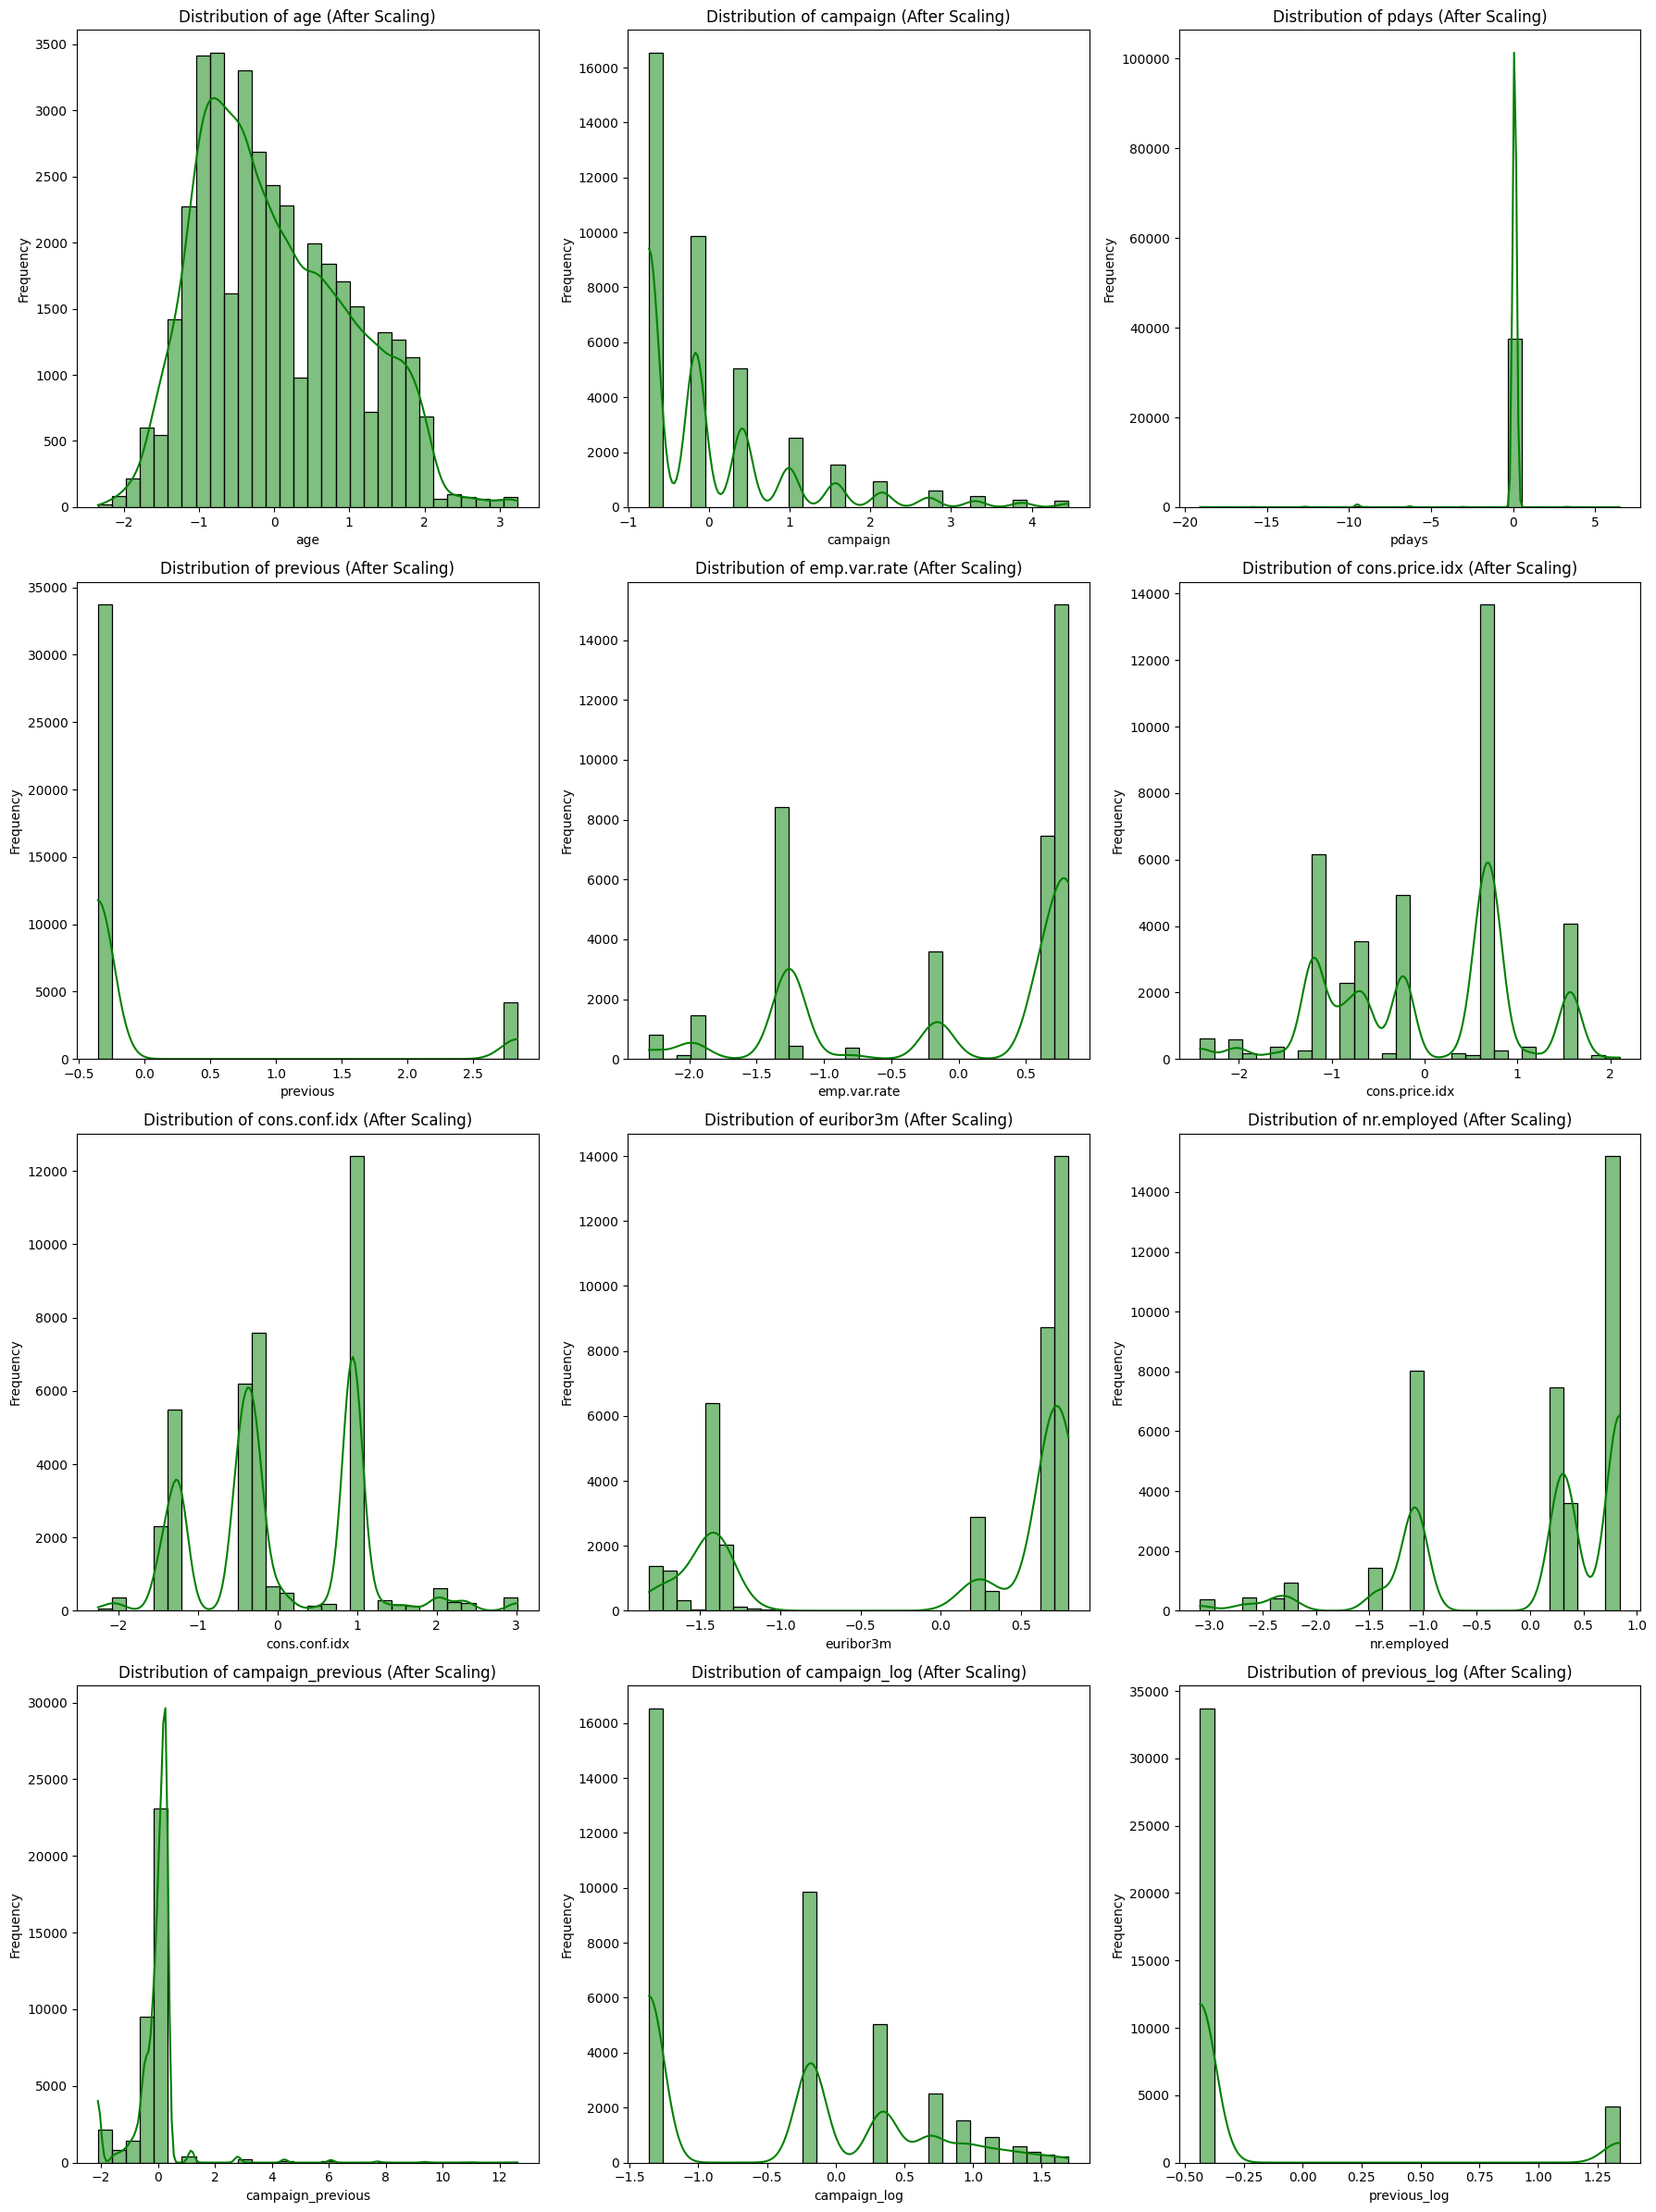

In [187]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate numerical columns
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns

# Calculate number of rows needed for the given number of columns
n_cols = 3  # Number of columns per row
n_rows = (len(numerical_cols) + n_cols - 1) // n_cols  # Number of rows needed

# Boxplot to show outliers (3 plots in each row)
plt.figure(figsize=(18, 6 * n_rows))  # Adjust figure size based on number of rows
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # n_rows rows, n_cols columns, plot i-th subplot
    sns.boxplot(x=data_cleaned[col], color="skyblue")
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)

plt.tight_layout()  # To prevent overlapping
plt.show()

# Distribution after scaling (3 plots in each row)
plt.figure(figsize=(18, 6 * n_rows))  # Adjust figure size based on number of rows
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(n_rows, n_cols, i)  # n_rows rows, n_cols columns, plot i-th subplot
    sns.histplot(data_cleaned[col], kde=True, bins=30, color='green')
    plt.title(f"Distribution of {col} (After Scaling)")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()  # To prevent overlapping
plt.show()


In [63]:
print(data.columns)
print(data_cleaned.columns)


Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')
Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_basic.6y', 'education_basic.9y',
       'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 

4. Correlation Heatmap

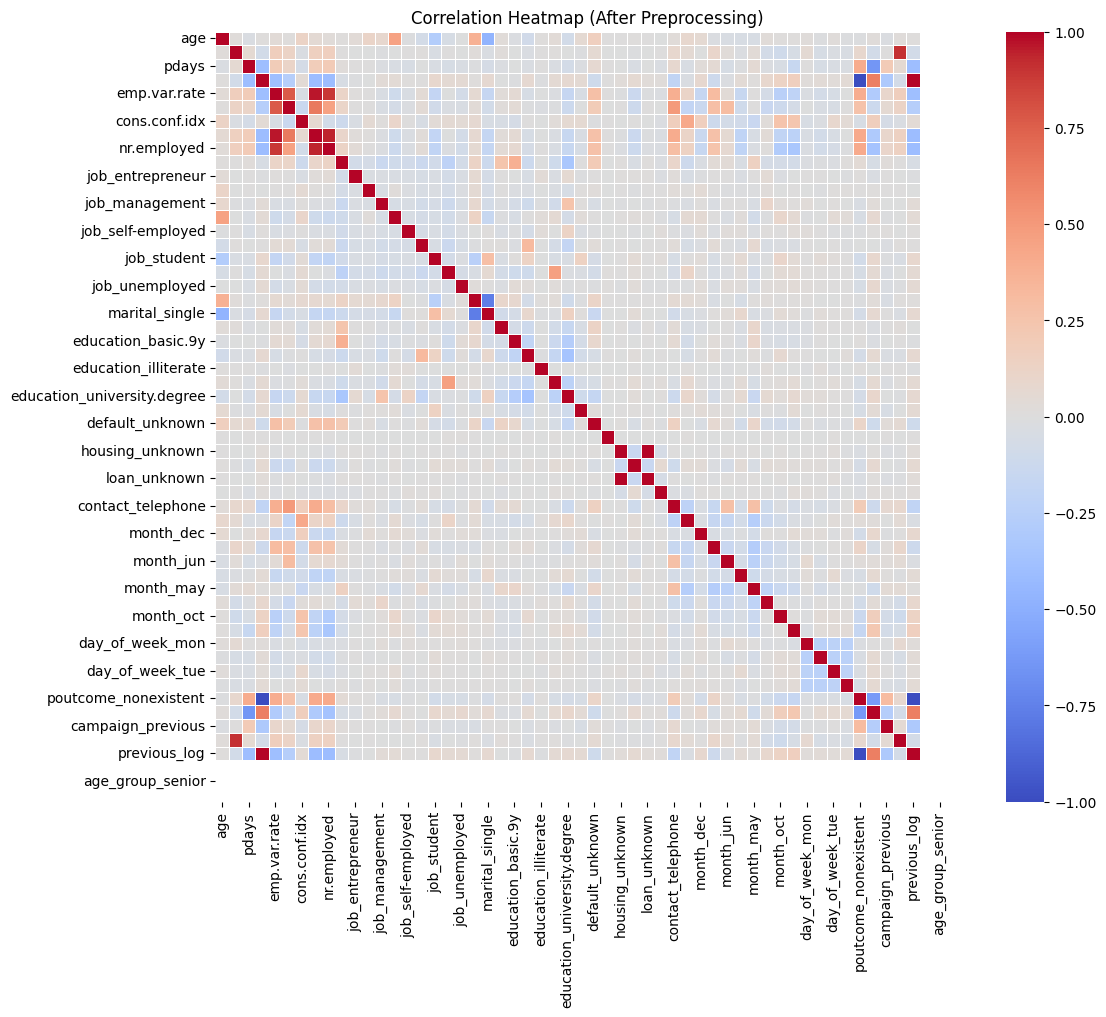

In [188]:
# Correlation heatmap after preprocessing
plt.figure(figsize=(12, 10))
corr_matrix = pd.DataFrame(X_resampled).corr()
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap (After Preprocessing)")
plt.show()


5. Log-transformed Feature Distributions

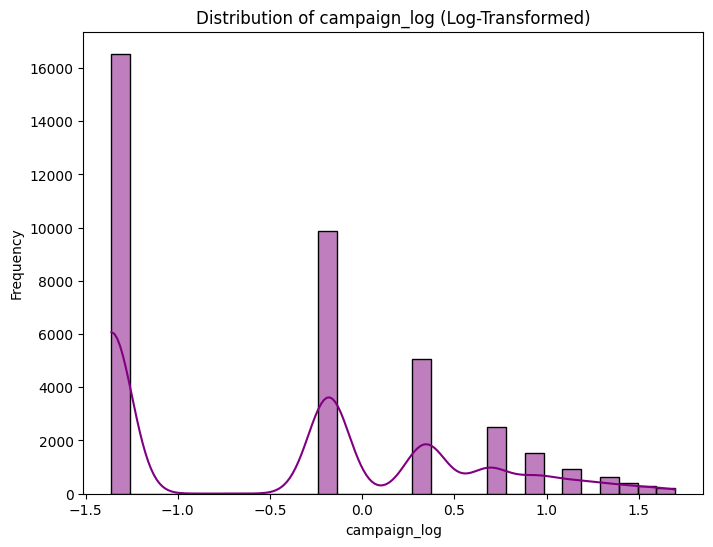

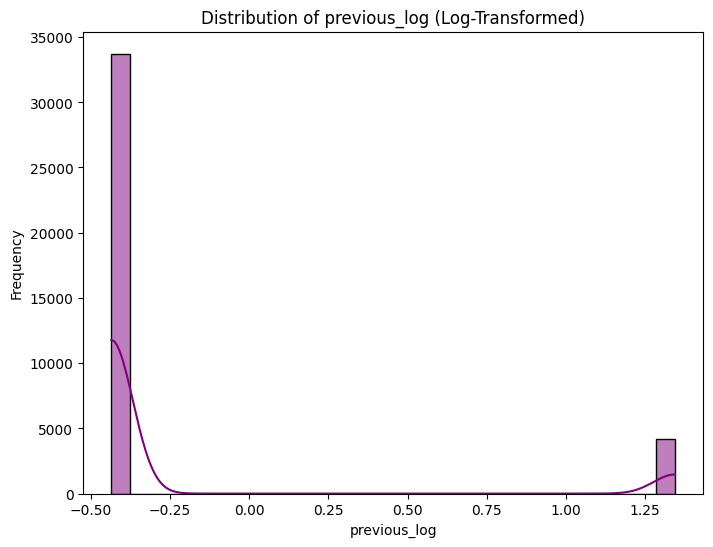

In [189]:
# Log-transformed features (campaign_log, previous_log)
log_features = ['campaign_log', 'previous_log']

for col in log_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_cleaned[col], kde=True, bins=30, color='purple')
    plt.title(f"Distribution of {col} (Log-Transformed)")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()


# Data Description



### 1. **Initial Dataset Overview**:
   - **Shape**: The dataset contains 41,188 rows and 21 columns, including numerical features (e.g., `age`, `duration`, `campaign`) and categorical features (e.g., `job`, `marital`, `education`). The target variable `y` is binary, encoded as `'yes'` or `'no'`.

---

### 2. **Missing Data Handling**:
   - **Missing Values**: Initially, there were no direct missing values, but `unknown` values existed in several categorical columns.
   - **Processing of `unknown` Values**:
     - Columns where the proportion of 'unknown' values exceeds 0.9% retain 'unknown' as a separate category.
     - For columns with 'unknown' values below this threshold, these are replaced with the most frequent value in the respective column using the SimpleImputer
   
   **Details**:
1. **Columns Retaining `'unknown'`**:
   - These columns have a proportion of `'unknown'` values greater than **0.9%**:
     - `education` (4.20%): `'unknown'` retained as a separate category.
     - `default` (20.88%): `'unknown'` retained as a separate category.
     - `housing` (2.40%): `'unknown'` retained as a separate category.
     - `loan` (2.40%): `'unknown'` retained as a separate category.

2. **Columns Replacing `'unknown'`**:
   - These columns have a proportion of `'unknown'` values less than or equal to **0.9%**, and `'unknown'` values are replaced with the most frequent value:
     - `job` (0.80%): Replaced `'unknown'` with the most frequent value.
     - `marital` (0.19%): Replaced `'unknown'` with the most frequent value.
     - `contact` (0.00%): Replaced `'unknown'` with the most frequent value.
     - `month` (0.00%): Replaced `'unknown'` with the most frequent value.
     - `day_of_week` (0.00%): Replaced `'unknown'` with the most frequent value.
     - `poutcome` (0.00%): Replaced `'unknown'` with the most frequent value.


---

### 3. **Outlier Handling**:
   - The column `pdays` contained 39,661 values of `999`, representing missing or irrelevant data. These values were replaced with `NaN`.
   - Rows containing outliers were removed, reducing the dataset by 3,247 rows.

---

### 4. **Feature Engineering**:
   - **One-Hot Encoding**: Categorical features (e.g., `job`, `marital`, `education`) were transformed into binary columns. After encoding, the dataset expanded to 51 columns.
   - **New Features**:
     - **Age Groups**: The `age` column was categorized into bins (`young`, `adult`, `senior`, `elder`) based on predefined ranges.
     - **Interaction Feature**: `campaign_previous` was created as the product of `campaign` and `previous`.
     - **Log Transformations**: `campaign` and `previous` columns were log-transformed to reduce skewness.

     **Examples of New Features**:
     - Age Groups:
       ```
       age        age_group
       1.685043   young
       1.788278   young
       -0.276423  NaN (indicates an issue in standardization)
       0.033282   young
       1.685043   young
       ```
     - Interaction Feature:
       ```
       campaign  previous  campaign_previous
       -0.7432   -0.352688  0.262118
       ```
     - Log-Transformed Features:
       ```
       campaign  previous  campaign_log  previous_log
       -0.7432   -0.352688  -1.359459     -0.434926
       ```

---

### 5. **Feature Scaling**:
   - Numerical features were standardized using `StandardScaler` to ensure zero mean and unit variance.

   **Standardized Features**:
   ```
       age        campaign     pdays  previous  emp.var.rate  cons.price.idx  
       1.685043   -0.7432   0.093211  -0.352688    0.621701        0.738522
   ```

---

### 6. **Handling Class Imbalance**:
   - The target variable was imbalanced, with 34,584 instances of class `0` ('no') and 3,345 instances of class `1` ('yes').
   - **SMOTE** (Synthetic Minority Over-sampling Technique) was applied to balance the classes, resulting in 34,584 samples for each class.

---

### 7. **Final Dataset Summary**:
   - **Final Shape**: After preprocessing, the dataset contains 69,168 rows and 51 features (after encoding and feature engineering).
   - **Balanced Target Distribution**:
     ```
     0    34,584
     1    34,584
     ```
   - The data is now fully preprocessed, with features engineered, standardized, and balanced, ready for modeling.

--- **bold text** **bold text**

#  4.Train the model

Class distribution in the resampled dataset: target
0    34481
1    34481
Name: count, dtype: int64

Training Random Forest Model...

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6881
           1       0.94      0.94      0.94      6912

    accuracy                           0.94     13793
   macro avg       0.94      0.94      0.94     13793
weighted avg       0.94      0.94      0.94     13793

Random Forest ROC-AUC Score: 0.9838199288701578


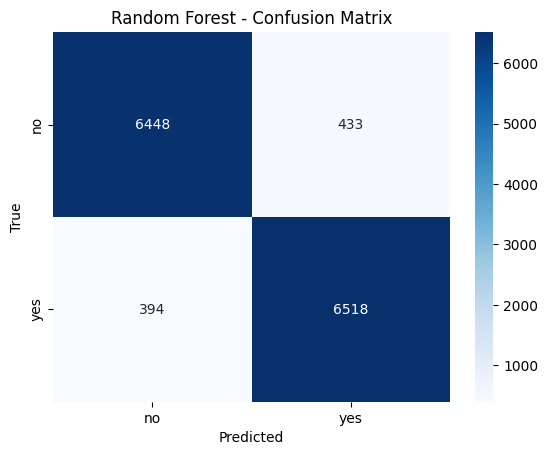


Training Neural Network Model...
Epoch 1/50
1725/1725 - 6s - 4ms/step - accuracy: 0.7877 - loss: 0.4593 - val_accuracy: 0.8261 - val_loss: 0.3930
Epoch 2/50
1725/1725 - 3s - 2ms/step - accuracy: 0.8287 - loss: 0.3827 - val_accuracy: 0.8444 - val_loss: 0.3468
Epoch 3/50
1725/1725 - 5s - 3ms/step - accuracy: 0.8414 - loss: 0.3540 - val_accuracy: 0.8520 - val_loss: 0.3313
Epoch 4/50
1725/1725 - 5s - 3ms/step - accuracy: 0.8491 - loss: 0.3367 - val_accuracy: 0.8599 - val_loss: 0.3159
Epoch 5/50
1725/1725 - 4s - 2ms/step - accuracy: 0.8544 - loss: 0.3250 - val_accuracy: 0.8620 - val_loss: 0.3088
Epoch 6/50
1725/1725 - 3s - 2ms/step - accuracy: 0.8576 - loss: 0.3159 - val_accuracy: 0.8651 - val_loss: 0.3043
Epoch 7/50
1725/1725 - 3s - 2ms/step - accuracy: 0.8603 - loss: 0.3097 - val_accuracy: 0.8678 - val_loss: 0.2959
Epoch 8/50
1725/1725 - 6s - 3ms/step - accuracy: 0.8639 - loss: 0.3030 - val_accuracy: 0.8680 - val_loss: 0.2934
Epoch 9/50
1725/1725 - 3s - 2ms/step - accuracy: 0.8658 - loss

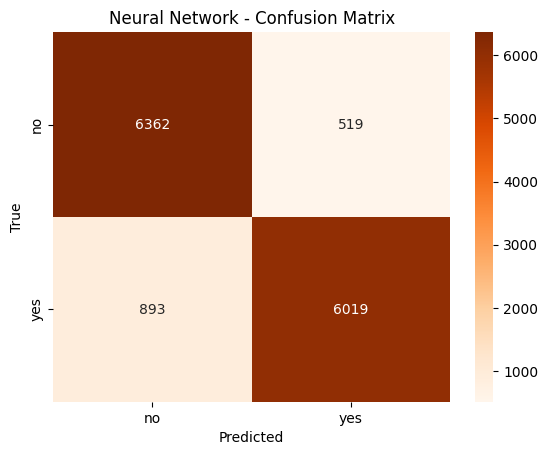

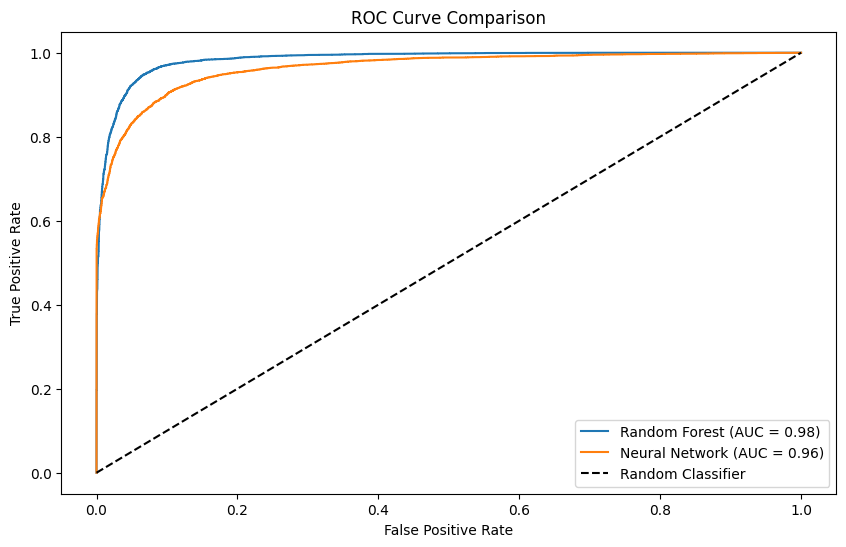

In [66]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, roc_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Step 1: Combine the features and target before balancing
data_combined = data_cleaned.copy()
data_combined['target'] = target_encoded

# Step 2: Apply SMOTE-Tomek to balance the entire dataset
smote_tomek = SMOTETomek(random_state=42)
X_resampled, y_resampled = smote_tomek.fit_resample(data_combined.drop(columns='target'), data_combined['target'])

# Check class distribution after resampling
print(f"Class distribution in the resampled dataset: {pd.Series(y_resampled).value_counts()}")

# Step 3: Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# ** RANDOM FOREST MODEL ** #
print("\nTraining Random Forest Model...")
rf_model = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Predictions and Evaluation
rf_pred = rf_model.predict(X_test)
rf_pred_prob = rf_model.predict_proba(X_test)[:, 1]

print("\nRandom Forest Classification Report:")
print(classification_report(y_test, rf_pred))

print("Random Forest ROC-AUC Score:", roc_auc_score(y_test, rf_pred_prob))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Random Forest - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ** NEURAL NETWORK MODEL ** #
print("\nTraining Neural Network Model...")
nn_model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Explicitly define input shape using Input layer
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

nn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the Neural Network
nn_history = nn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=32, verbose=2)

# Predictions and Evaluation
nn_pred_prob = nn_model.predict(X_test).flatten()
nn_pred = (nn_pred_prob > 0.5).astype(int)

print("\nNeural Network Classification Report:")
print(classification_report(y_test, nn_pred))

print("Neural Network ROC-AUC Score:", roc_auc_score(y_test, nn_pred_prob))

# Plot Confusion Matrix for Neural Network
cm_nn = confusion_matrix(y_test, nn_pred)
sns.heatmap(cm_nn, annot=True, fmt='d', cmap='Oranges', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title("Neural Network - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# ** ROC CURVES COMPARISON ** #
# Compute ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_pred_prob)
# Compute ROC Curve for Neural Network
fpr_nn, tpr_nn, _ = roc_curve(y_test, nn_pred_prob)

# Plot ROC Curve
plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(roc_auc_score(y_test, rf_pred_prob)))
plt.plot(fpr_nn, tpr_nn, label="Neural Network (AUC = {:.2f})".format(roc_auc_score(y_test, nn_pred_prob)))
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()


**FEATURE IMPORTANCE PLOT FOR RANDOM FOREST MODEL WITH IMPROVED VISIBILITY**

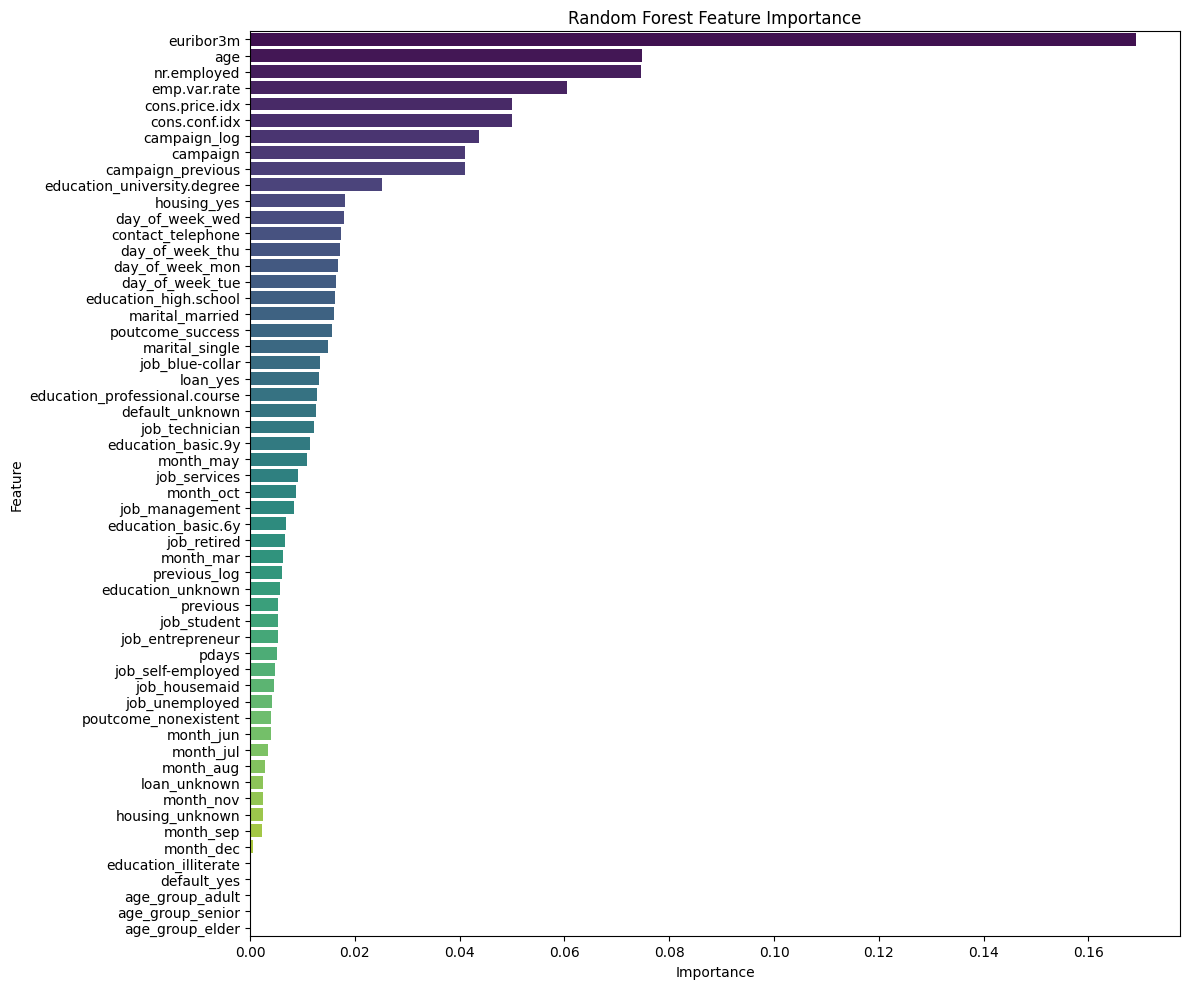

In [ ]:
# ** FEATURE IMPORTANCE PLOT FOR RANDOM FOREST MODEL WITH IMPROVED VISIBILITY ** #

# Step 1: Extract feature importances from the trained Random Forest model
feature_importance = rf_model.feature_importances_

# Step 2: Create a DataFrame to hold feature names and their importance
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importance
})

# Step 3: Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Step 4: Plot the feature importance with improved visibility
plt.figure(figsize=(12, 10))  # Increase figure size for better readability
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis',hue='Feature',dodge=False)

# Rotate feature names on the y-axis for better visibility
plt.yticks(rotation=0)  # Keep the y-axis labels horizontal for better readability
plt.title('Random Forest Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')

# Adjust layout to prevent label clipping
plt.tight_layout()

# Show the plot
plt.show()


## Comparison of Random Forest and Neural Network Performance

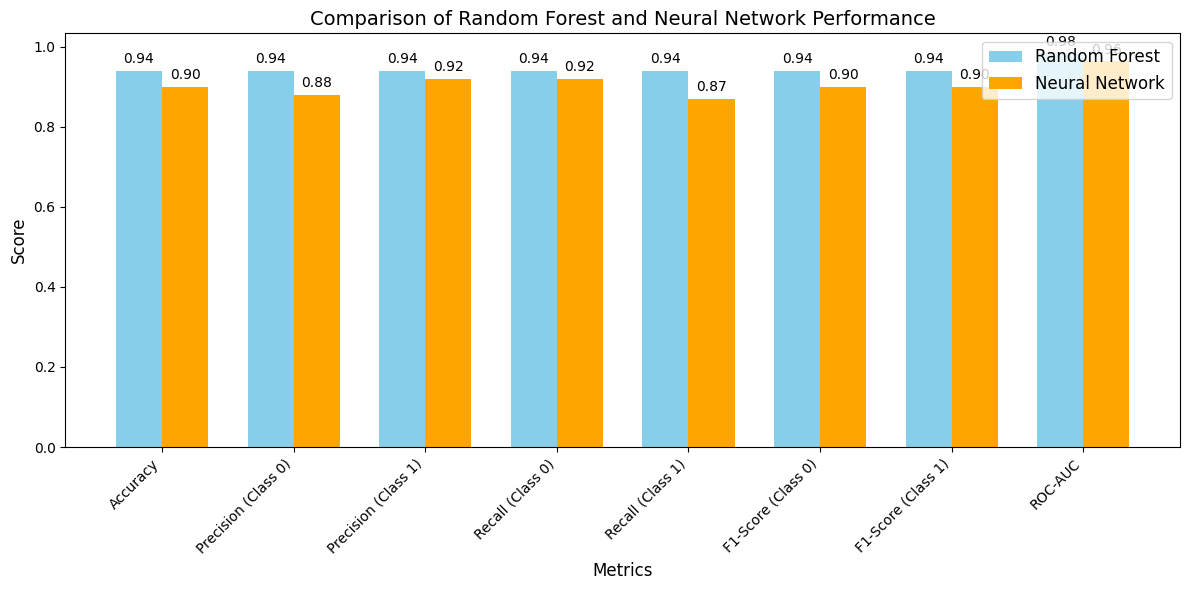

In [67]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for Random Forest
rf_metrics = {
    "Accuracy": 0.94,
    "Precision (Class 0)": 0.94,
    "Precision (Class 1)": 0.94,
    "Recall (Class 0)": 0.94,
    "Recall (Class 1)": 0.94,
    "F1-Score (Class 0)": 0.94,
    "F1-Score (Class 1)": 0.94,
    "ROC-AUC": 0.9838,
}

# Metrics for Neural Network
nn_metrics = {
    "Accuracy": 0.90,
    "Precision (Class 0)": 0.88,
    "Precision (Class 1)": 0.92,
    "Recall (Class 0)": 0.92,
    "Recall (Class 1)": 0.87,
    "F1-Score (Class 0)": 0.90,
    "F1-Score (Class 1)": 0.90,
    "ROC-AUC": 0.9638,
}

# Metric labels and values
labels = list(rf_metrics.keys())
rf_values = list(rf_metrics.values())
nn_values = list(nn_metrics.values())

# Create a bar chart
x = np.arange(len(labels))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
bars_rf = ax.bar(x - width / 2, rf_values, width, label='Random Forest', color='skyblue')
bars_nn = ax.bar(x + width / 2, nn_values, width, label='Neural Network', color='orange')

# Add labels, title, and legend
ax.set_xlabel('Metrics', fontsize=12)
ax.set_ylabel('Score', fontsize=12)
ax.set_title('Comparison of Random Forest and Neural Network Performance', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45, ha='right', fontsize=10)
ax.legend(fontsize=12)

# Annotate bar values
for bars in [bars_rf, bars_nn]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()
